In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
from scipy.spatial import distance
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib.pyplot as plt 
from scipy.interpolate import griddata
from mpl_toolkits import mplot3d
from scipy import interpolate
from scipy.optimize import curve_fit
import fsps
import sedpy
import prospect
import time, sys, os
import h5py
import os.path

In [2]:
## Shipley :
cluster_list=['M0416','M0717','M1149', 'a370', 'A370', 'A2744']
full_name_cluster=['macs0416', 'macs0717', 'macs1149', 'abell370', 'abell2744']
cluster=cluster_list[1]
full_cluster=full_name_cluster[1]


##Ani:
# cluster='A1689'
cluster='M0717'
spec_id= 3958.0   


In [3]:
##Shipley:
f9=np.loadtxt('Shipley_hffds_'+str(full_cluster)+'clu_v3.9.cat', usecols=(0,3,4,))
f8=np.loadtxt('Shipley_'+str(full_cluster)+'clu_v3.9.fout')
f7=pd.read_excel('Shipley_magnification.xlsx', sheet_name=cluster)  ## Glafic is model4 for all clusters, except for M0416 which is model5


##Ani:


In [4]:
##Shipley:

## M0416 find arcs in the Shipley catalog:

id1=f9[:,0]
ra1=f9[:,1]
dec1=f9[:,2]


zred1=f8[:,1]


if cluster=='M0416':
    
    magnification=f7['model5_b']  ## Glafic best value   For m0717,m1149,a370,a2744 Glafic is model4. Only for m0416 Glafic is model5.
else:
    magnification=f7['model4_b'] 

cond5=magnification>=1 

ra1=ra1[cond5]
dec1=dec1[cond5]
zred1=zred1[cond5]
magnification=magnification[cond5]
id1=id1[cond5]



# for i in range(len(ra1)):
#     print ('circle('+str(ra1[i])+','+str(dec1[i])+',0.5")')
#     print ('# text('+str(ra1[i])+','+str(dec1[i])+')   text={'+str(int(id1[i]))+'}')
#     print ('# text('+str(ra1[i])+','+str(dec1[i]+0.0001)+')   text={'+str(zred1[i]) +'}')

In [5]:
##Shipley:
f1=pd.read_excel('Shipley_cat_photometry.xlsx', sheet_name=cluster) ## Shipley et al. 2018


In [89]:
##Shipley:
id1=f1['id']
ra1=f1['ra']
dec1=f1['dec']

id_arc2=4419
ind1= id1==id_arc2
ind1

### To compare my best-fit SED params with Shipley:
f6=np.loadtxt('Shipley_'+str(full_cluster)+'clu_v3.9.fout')
id6=f6[ind1,0]
zphot6=f6[ind1,1]
# zphot6=2.39
log_tau_sh=f6[ind1,2]
z_metal_sh=f6[ind1,3]
log_age_sh=f6[ind1,4]
Av_sh=f6[ind1,5]
log_mass_sh=f6[ind1,6]
log_sfr_sh=f6[ind1,7]



if cluster=='M0416':
    magnification=f7['model5_b'][ind1]  ## Glafic best value   For m0717,m1149,a370,a2744 Glafic is model4. Only for m0416 Glafic is model5.
else:
    magnification=f7['model4_b'][ind1] 


print('id: ',id1[ind1],'ra: ',ra1[ind1], 'dec: ',dec1[ind1],'id: ', id6,'zphot: ',zphot6,'magnifiication: ',magnification,log_tau_sh,z_metal_sh,log_age_sh,Av_sh,'log_mass: ',log_mass_sh, log_sfr_sh)



## WFC3/UVIS
f225w, e225w=f1['f_F225W'][ind1], f1['e_F225W'][ind1]  ## f_nu [erg/sec/cm^2/Hz], m_AB=-2.5*alog10(f_nu)+25
f275w, e275w=f1['f_F275W'][ind1], f1['e_F275W'][ind1]
f336w, e336w=f1['f_F336W'][ind1], f1['e_F336W'][ind1]
f390w, e390w=f1['f_F390W'][ind1], f1['e_F390W'][ind1]
## ACS/WFC
f435w, e435w=f1['f_F435W'][ind1], f1['e_F435W'][ind1]
f475w, e475w=f1['f_F475W'][ind1], f1['e_F475W'][ind1]
f555w, e555w=f1['f_F555W'][ind1], f1['e_F555W'][ind1]
f606w, e606w=f1['f_F606W'][ind1], f1['e_F606W'][ind1]
f625w, e625w=f1['f_F625W'][ind1], f1['e_F625W'][ind1]
f775w, e775w=f1['f_F775W'][ind1], f1['e_F775W'][ind1]
f814w, e814w=f1['f_F814W'][ind1], f1['e_F814W'][ind1]
f850lp, e850lp=f1['f_F850LP'][ind1], f1['e_F850LP'][ind1]
## WFC3/IR
f105w, e105w=f1['f_F105W'][ind1], f1['e_F105W'][ind1]
f110w, e110w=f1['f_F110W'][ind1], f1['e_F110W'][ind1]
f125w, e125w=f1['f_F125W'][ind1], f1['e_F125W'][ind1]
f140w, e140w=f1['f_F140W'][ind1], f1['e_F140W'][ind1]
f160w, e160w=f1['f_F160W'][ind1], f1['e_F160W'][ind1]
## MOSFIRE/K-band
# fKs, eKs=f1['f_KS_HAWKI'][ind1], f1['e_KS_HAWKI'][ind1]
fKs, eKs=f1['f_KS_MOSFIRE'][ind1], f1['e_KS_MOSFIRE'][ind1]
## Spitzer/IRAC 3.6,4.5 micron
fCH1, eCH1=f1['f_CH1'][ind1], f1['e_CH1'][ind1]
fCH2, eCH2=f1['f_CH2'][ind1], f1['e_CH2'][ind1]



#### MOSFIRE spectra :

import os.path


save_path='/Users/najmehemami/Research/Summer2020/Flashlights/SED_fitting_Prospecotr/Tim_Brian_SED/tabulated_ind_model_spectra/'
complete_name3=os.path.join(save_path, 'macsj0717_z2_K.K.3958.fc.1d.esc.slc.han2doublet-model.txt')
complete_name2=os.path.join(save_path, 'macsj0717_z2_K.H.3958.fc.1d.esc.slc.hbo3doublet-model.txt')
complete_name1=os.path.join(save_path, 'macsj0717_z2_K.H.3958.fc.1d.esc.slc.hg4363-model.txt')

# f4=np.loadtxt('macsj0717_z2_K.J.4939.fc.1d.txt')
f4=np.loadtxt(complete_name1)
f5=np.loadtxt(complete_name2)
f6=np.loadtxt(complete_name3)

spec_wave=np.append(f4[:,0],np.append(f5[:,0],f6[:,0]))
spec_flux=np.append(f4[:,1],np.append(f5[:,1],f6[:,1])) ## f_lamda [erg/sec/cm2/A], m_AB=-2.5*alog10(f_nu)-48.6
spec_flux_err= np.append(f4[:,2],np.append(f5[:,2],f6[:,2])) ##erg/sec/cm2/A
spec_flux_model=np.append(f4[:,3],np.append(f5[:,3],f6[:,3]))

ind_spec_ha=np.logical_and(spec_wave>=(zphot6+1)*6562 -30, spec_wave<=(zphot6+1)*6562 +30)
ind_spec_hb=np.logical_and(spec_wave>=(zphot6+1)*4862 -20, spec_wave<=(zphot6+1)*4862 +20)
ind_spec=np.logical_or (ind_spec_ha, ind_spec_hb)
ind_spec=ind_spec_ha

spec_wave= spec_wave[ind_spec]
spec_flux=spec_flux[ind_spec]
spec_flux_err=spec_flux_err[ind_spec] 
# spec_flux_err=np.zeros(shape=(len(spec_flux)))
spec_flux_model=spec_flux_model[ind_spec]
spec_flux_err[(spec_flux_model- spec_flux_err)<0]=spec_flux_model[(spec_flux_model- spec_flux_err)<0]



### To convert Shipley's fluxes to maggie fluxes:

flux_list=[f225w, f275w, f336w, f390w, f435w, f475w,f606w, f625w, f775w, f814w, f850lp, f105w, f110w, f125w, f140w, f160w, fKs, fCH1, fCH2 ]
err_flux_list=[e225w, e275w, e336w, e390w, e435w, e475w, e606w, e625w, e775w, e814w, e850lp, e105w, e110w, e125w,e140w,e160w,eKs , eCH1,eCH2]

for k1 in range(len(flux_list)):
    flux_list[k1]=np.array(flux_list[k1])[0]

for k1 in range(len(err_flux_list)):
    err_flux_list[k1]=np.array(err_flux_list[k1])[0]
flux_list=np.array(flux_list)
indx_pos= flux_list<0
flux_list[indx_pos]=0

# For shipley flux, to convert it to maggie flux:
flux_maggie=np.array(flux_list)*1e-10
err_maggie=np.array(err_flux_list)*1e-10


### To convert Ani's fluxes to maggie fluxes:
## first f_lamda to f_nu:
f_nu_spec=spec_flux_model* ((spec_wave)**2)/3e18
e_nu_spec=spec_flux_err* ((spec_wave)**2)/3e18

## Then convert f_nu to maggie flux:
flux_maggie_spec=f_nu_spec*10**(19.44)
err_maggie_spec=e_nu_spec*10**(19.44)

# flux_maggie*=10**(19.44)
# err_maggie*=10**(19.44)


#### Correcting for magnification:

## From website here is the magnification estimates from Lenstool:

#CATSv4.1:
#  7.59 best;   7.22+0.55-0.66   [ 6.55,  7.77]  median and 68.3% confidence range
lens_magnific=np.array(magnification)[0]  ## is equivalent to 10^(0.4 * mu(magnification))
err_magnif=0

flux_maggie/=lens_magnific
err_maggie=np.sqrt( (err_maggie/lens_magnific)**2 + (err_magnif*flux_maggie/(lens_magnific)**2)**2 )


flux_maggie_spec/=lens_magnific
err_maggie_spec=np.sqrt( (err_maggie_spec/lens_magnific)**2 + (err_magnif*flux_maggie_spec/(lens_magnific)**2)**2 )

flux_maggie_spec+= 3e-11
# err_maggie_spec+=3.2e-10
# err_maggie_spec=np.zeros(len(flux_maggie_spec))

id:  4418    4419
Name: id, dtype: int64 ra:  4418    109.364337
Name: ra, dtype: float64 dec:  4418    37.757062
Name: dec, dtype: float64 id:  [4419.] zphot:  [2.3937] magnifiication:  4418    6.1799
Name: model4_b, dtype: float64 [7.6] [0.02] [8.4] [0.2] log_mass:  [9.71] [0.34]


<ErrorbarContainer object of 3 artists>

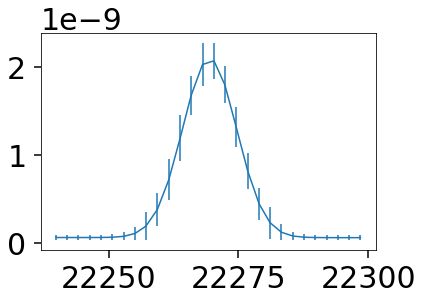

In [90]:


plt.errorbar(spec_wave, flux_maggie_spec , yerr=err_maggie_spec)
# plt.errorbar(spec_wave, spec_flux_model, yerr=spec_flux_err, color='red')
# plt.errorbar(flux_maggie, yerr=err_maggie)

In [170]:
flux_maggie_spec
spec_flux
spec_wave
# np.append(f4[:,0],np.append(f5[:,0],f6[:,0]))

array([], dtype=float64)

In [22]:
# ##Ani:
# hdu1=fits.open('1_ani_cat1689_spec_errors_corrected.fits')
# f1=hdu1[1].data
# id6=f1['SPEC_ID']
# id6=np.array([float(i) for i in id6])
# ind1= np.where(id6==spec_id)[0][0]


# ra1=f1['RA'][ind1]
# dec1=f1['DEC'][ind1]
# zphot6=f1['SPEC_Z'][ind1]
# log_tau_sh=f1['LTAU_SMC'][ind1]
# z_metal_sh=f1['METAL_SMC'][ind1]
# log_age_sh=f1['LAGE_SMC'][ind1]
# Av_sh=f1['AV_SMC'][ind1]
# log_mass_sh=f1['LMASS_SMC'][ind1]
# log_sfr_sh=f1['LSFR_SMC'][ind1]
# magnification=f1['MAGN'][ind1]
# magnification=np.power(10, 0.4*magnification)

# if f1['PHOTOMETRY_ID_IR'][ind1]==-1:
    
#     f225w, e225w=f1['F225W'][ind1], f1['EF225W'][ind1]  ## f_nu [erg/sec/cm^2/Hz], m_AB=-2.5*alog10(f_nu)+25
#     f275w, e275w=f1['F275W'][ind1], f1['EF275W'][ind1]
#     f336w, e336w=f1['F336W'][ind1], f1['EF336W'][ind1]
# #     f390w, e390w=f1['F390W'][ind1], f1['EF390W'][ind1]
#     ## ACS/WFC
# #     f435w, e435w=f1['F435W'][ind1], f1['EF435W'][ind1]
#     f475w, e475w=f1['F475W'][ind1], f1['EF475W'][ind1]
# #     f555w, e555w=f1['F555W'][ind1], f1['EF555W'][ind1]
# #     f606w, e606w=f1['F606W'][ind1], f1['EF606W'][ind1]
#     f625w, e625w=f1['F625W'][ind1], f1['EF625W'][ind1]
#     f775w, e775w=f1['F775W'][ind1], f1['EF775W'][ind1]
#     f814w, e814w=f1['F814W'][ind1], f1['EF814W'][ind1]
#     f850lp, e850lp=f1['F850LP'][ind1], f1['EF850LP'][ind1]
#     ## WFC3/IR
# #     f105w, e105w=f1['F105W'][ind1], f1['EF105W'][ind1]
# #     f110w, e110w=f1['F110W'][ind1], f1['EF110W'][ind1]
#     f125w, e125w=f1['F125W_IR'][ind1], f1['EF125W_IR'][ind1]
# #     f140w, e140w=f1['F140W'][ind1], f1['EF140W'][ind1]
#     f160w, e160w=f1['F160W_IR'][ind1], f1['EF160W_IR'][ind1]

# else:
    
#     f225w, e225w=f1['F225W_IR'][ind1], f1['EF225W_IR'][ind1]  ## f_nu [erg/sec/cm^2/Hz], m_AB=-2.5*alog10(f_nu)+25
#     f275w, e275w=f1['F275W_IR'][ind1], f1['EF275W_IR'][ind1]
#     f336w, e336w=f1['F336W_IR'][ind1], f1['EF336W_IR'][ind1]
# #     f390w, e390w=f1['F390W'][ind1], f1['EF390W'][ind1]
#     ## ACS/WFC
# #     f435w, e435w=f1['F435W'][ind1], f1['EF435W'][ind1]
#     f475w, e475w=f1['F475W_IR'][ind1], f1['EF475W_IR'][ind1]
# #     f555w, e555w=f1['F555W'][ind1], f1['EF555W'][ind1]
# #     f606w, e606w=f1['F606W'][ind1], f1['EF606W'][ind1]
#     f625w, e625w=f1['F625W_IR'][ind1], f1['EF625W_IR'][ind1]
#     f775w, e775w=f1['F775W_IR'][ind1], f1['EF775W_IR'][ind1]
#     f814w, e814w=f1['F814W_IR'][ind1], f1['EF814W_IR'][ind1]
#     f850lp, e850lp=f1['F850LP_IR'][ind1], f1['EF850LP_IR'][ind1]
#     ## WFC3/IR
# #     f105w, e105w=f1['F105W'][ind1], f1['EF105W'][ind1]
# #     f110w, e110w=f1['F110W'][ind1], f1['EF110W'][ind1]
#     f125w, e125w=f1['F125W_IR'][ind1], f1['EF125W_IR'][ind1]
# #     f140w, e140w=f1['F140W'][ind1], f1['EF140W'][ind1]
#     f160w, e160w=f1['F160W_IR'][ind1], f1['EF160W_IR'][ind1]
    

    
# #########################################################################################    
# ## FOR ID 217, THERE IS A SEPARATE CATALOG WITH WFC3IR FILTERS THAT ANI RAN FOR TIM'S PAPER:
# # hdu2=fits.open('photometry_SEDparams_spec_id_217_phot_id_40011_erg.fits')
# # f2=hdu2[1].data
# # id7=f1['SPEC_ID']
# # id7=np.array([float(i) for i in id7])
# # ind2= np.where(id7==spec_id)[0][0]
# # ra1=f1['RA'][ind1]
# # dec1=f1['DEC'][ind1]
# # zphot6=f1['SPEC_Z'][ind1]
# # log_tau_sh=f2['LTAU_SMC'][0]
# # z_metal_sh=f2['METAL_SMC'][0]
# # log_age_sh=f2['LAGE_SMC'][0]
# # Av_sh=f2['AV_SMC'][0]
# # log_mass_sh=f2['LMASS_SMC'][0]
# # log_sfr_sh=f2['LSFR_SMC'][0]
# # magnification=f1['MAGN'][ind1]
# # magnification=np.power(10, 0.4*magnification)

# # f225w, e225w=f2['F225W_IR'][0], f2['EF225W_IR'][0]  ## f_nu [erg/sec/cm^2/Hz], m_AB=-2.5*alog10(f_nu)+25
# # f275w, e275w=f2['F275W_IR'][0], f2['EF275W_IR'][0]
# # f336w, e336w=f2['F336W_IR'][0], f2['EF336W_IR'][0]
# # #     f390w, e390w=f1['F390W'][ind1], f1['EF390W'][ind1]
# # ## ACS/WFC
# # #     f435w, e435w=f1['F435W'][ind1], f1['EF435W'][ind1]
# # f475w, e475w=f2['F475W_IR'][0], f2['EF475W_IR'][0]
# # #     f555w, e555w=f1['F555W'][ind1], f1['EF555W'][ind1]
# # #     f606w, e606w=f1['F606W'][ind1], f1['EF606W'][ind1]
# # f625w, e625w=f2['F625W_IR'][0], f2['EF625W_IR'][0]
# # f775w, e775w=f2['F775W_IR'][0], f2['EF775W_IR'][0]
# # f814w, e814w=f2['F814W_IR'][0], f2['EF814W_IR'][0]
# # f850lp, e850lp=f2['F850LP_IR'][0], f2['EF850LP_IR'][0]
# # ## WFC3/IR
# # #     f105w, e105w=f1['F105W'][ind1], f1['EF105W'][ind1]
# # #     f110w, e110w=f1['F110W'][ind1], f1['EF110W'][ind1]
# # f125w, e125w=f2['F125W_IR'][0], f2['EF125W_IR'][0]
# # #     f140w, e140w=f1['F140W'][ind1], f1['EF140W'][ind1]
# # f160w, e160w=f2['F160W_IR'][0], f2['EF160W_IR'][0]
# # #################################################################



# ### To convert Shipley's fluxes to maggie fluxes:

# flux_list=np.array([f225w, f275w, f336w, f475w, f625w, f775w, f814w, f850lp, f125w, f160w])
# err_flux_list=np.array([e225w, e275w, e336w, e475w, e625w, e775w, e814w, e850lp, e125w, e160w])

# ## Naj: negative fluxes raise "SFR cannot be negative" error.
# ### According to Ben Johnson, the best way to treat non-detections is to set negative fluxes zero and give error bars as the 1 sigma upper limit: https://github.com/bd-j/prospector/issues/97  
# indx_pos= flux_list<0
# flux_list[indx_pos]=0


# for k1 in range(len(flux_list)):
#     flux_list[k1]=np.array(flux_list[k1])

# for k1 in range(len(err_flux_list)):
#     err_flux_list[k1]=np.array(err_flux_list[k1])


# flux_maggie=flux_list
# err_maggie=err_flux_list


# #### MOSFIRE spectra for ID 2185 in M1149 K-band:

# import os.path


# save_path='/Users/najmehemami/Research/Summer2020/Flashlights/SED_fitting_Prospecotr/Tim_Brian_SED/tabulated_ind_model_spectra/'
# complete_name3=os.path.join(save_path, 'abell1689_z2_3.K.1059.fc.1d.esc.slc.han2doublet-model.txt')
# complete_name2=os.path.join(save_path, 'abell1689_z2_3.H.1059.fc.1d.esc.slc.hbo3doublet-model.txt')
# complete_name1=os.path.join(save_path, 'abell1689_z2_3.H.1059.fc.1d.esc.slc.hg4363-model.txt')

# # f4=np.loadtxt('macsj0717_z2_K.J.4939.fc.1d.txt')
# f4=np.loadtxt(complete_name1)
# f5=np.loadtxt(complete_name2)
# f6=np.loadtxt(complete_name3)

# spec_wave=np.append(f4[:,0],np.append(f5[:,0],f6[:,0]))
# spec_flux=np.append(f4[:,1],np.append(f5[:,1],f6[:,1])) ## f_lamda [erg/sec/cm2/A], m_AB=-2.5*alog10(f_nu)-48.6
# spec_flux_err= np.append(f4[:,2],np.append(f5[:,2],f6[:,2])) ##erg/sec/cm2/A
# spec_flux_model=np.append(f4[:,3],np.append(f5[:,3],f6[:,3]))

# ind_spec_ha=np.logical_and(spec_wave>=(zphot6+1)*6563 -50, spec_wave<=(zphot6+1)*6563 +50)
# ind_spec_hb=np.logical_and(spec_wave>=(zphot6+1)*4862 -50, spec_wave<=(zphot6+1)*4862 +50)
# ind_spec=np.logical_or (ind_spec_ha, ind_spec_hb)
# ind_spec=ind_spec_ha

# spec_wave= spec_wave[ind_spec]
# spec_flux=spec_flux[ind_spec]
# spec_flux_err=spec_flux_err[ind_spec] 
# # spec_flux_err=np.zeros(shape=(len(spec_flux)))
# spec_flux_model=spec_flux_model[ind_spec]
# spec_flux_err[(spec_flux_model- spec_flux_err)<0]=spec_flux_model[(spec_flux_model- spec_flux_err)<0]

# fig=plt.figure(figsize=(16,4), dpi=250)
# ax=fig.add_subplot(111)
# # plt.errorbar(spec_wave, spec_flux, yerr=spec_flux_err, color='blue', ecolor='skyblue')
# # ax=fig.add_subplot(212)
# plt.errorbar(spec_wave, spec_flux_model, yerr=spec_flux_err, color='red', ecolor='lightpink')
# # plt.xlim(1.46e4, 1.485e4)
# # plt.ylim(-0.5e-17, 2e-17)




# ### To convert Ani's fluxes to maggie fluxes:
# ## first f_lamda to f_nu:
# f_nu_spec=spec_flux_model* ((spec_wave)**2)/3e18
# e_nu_spec=spec_flux_err* ((spec_wave)**2)/3e18

# ## Then convert f_nu to maggie flux:
# flux_maggie_spec=f_nu_spec*10**(19.44)
# err_maggie_spec=e_nu_spec*10**(19.44)

# flux_maggie*=10**(19.44)
# err_maggie*=10**(19.44)
# #### Correcting for magnification:

# ## From website here is the magnification estimates from Lenstool:

# #CATSv4.1:
# #  7.59 best;   7.22+0.55-0.66   [ 6.55,  7.77]  median and 68.3% confidence range
# # lens_magnific=magnification ## is equivalent to 10^(0.4 * mu(magnification))
# lens_magnific=magnification ##magnitude unit
# err_magnif=0.0

# flux_maggie/=lens_magnific
# err_maggie/=lens_magnific


# flux_maggie_spec/=lens_magnific
# err_maggie_spec=np.sqrt( (err_maggie_spec/lens_magnific)**2 + (err_magnif*flux_maggie_spec/(lens_magnific)**2)**2 )

# print('id: ',id6[ind1],'zphot: ',zphot6,'magnifiication: ',lens_magnific,log_tau_sh,z_metal_sh,log_age_sh,Av_sh,'log_mass: ',log_mass_sh, log_sfr_sh)


In [126]:
ind2
f2['F225W_IR']
flux_list

array([4.7600433e-13, 4.9703605e-14, 1.5662115e-12, 8.4116863e-12,
       9.1299971e-12, 9.1792589e-12, 1.0148682e-11, 8.9115078e-12,
       1.1072896e-11, 1.2620819e-11], dtype=float32)

In [156]:
flux_maggie- err_maggie
indx_pos

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [157]:
flux_maggie

array([7.09981754e-12, 2.42015439e-12, 5.71101754e-12, 1.95795088e-11,
       3.53280000e-11, 4.91418947e-11, 8.37699649e-11, 8.75577544e-11,
       1.03157614e-10, 1.07406877e-10, 9.40492632e-11, 1.24455439e-10,
       1.47047018e-10, 1.59461053e-10, 1.98067368e-10, 2.27788070e-10,
       2.42426667e-10, 2.73799298e-10, 2.77490526e-10])

In [79]:
flux_list>0
flux_list[indx_pos]
err_maggie

array([5.2025783e-13, 3.3650312e-13, 2.9657150e-13, 5.5389303e-13,
       6.7878385e-13, 7.2718193e-13, 5.2035275e-13, 8.9273597e-13,
       1.0492027e-12, 1.2401121e-12], dtype=float32)

In [91]:
#### Strat Prospector:
### SED modeling by Prospector:
from matplotlib.pyplot import *
# re-defining plotting defaults
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import scipy
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 30})

In [92]:
### The data to be built:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
zred=zphot6 # ID 4939 in M0717
lum_dist=cosmo.luminosity_distance(zred).value  ## luminosity distance in Mpc
age_universe=cosmo.age(zred).value

def build_obs(ldist=lum_dist, **extras):
    """Build a dictionary of observational data. 
    :returns obs:
    A dictionary of observational data to use in the fit.
    """

    from prospect.utils.obsutils import fix_obs
    import sedpy

    # The obs dictionary, empty for now
    obs = {}
    
    # These are the names of the relevant filters, 
    # in the same order as the photometric data (see below)
    
    ##Shipley:
    wfc3_uvis = ['wfc3_uvis_'+n+'w' for n in ['f225','f275','f336','f390']]
    acs_wfc = ['acs_wfc_'+n for n in ['f435w','f475w','f606w','f625w','f775w','f814w','f850lp']]
    wfc3_ir= ['wfc3_ir_'+n+'w' for n in ['f105','f110','f125','f140','f160']]
    mosfire_ks=['mosfire_Ks']
    spitzer=['spitzer_irac_ch'+n for n in ['1','2']]
    filternames = wfc3_uvis + acs_wfc + wfc3_ir + mosfire_ks + spitzer
#     filternames = wfc3_uvis + acs_wfc + wfc3_ir
    ##Ani:
#     wfc3_uvis = ['wfc3_uvis_'+n+'w' for n in ['f225','f275','f336']]
#     acs_wfc = ['acs_wfc_'+n for n in ['f475w','f625w','f775w','f814w','f850lp']]
#     wfc3_ir= ['wfc3_ir_'+n+'w' for n in ['f125','f160']]
#     filternames = wfc3_uvis + acs_wfc + wfc3_ir
    
    filternames=np.array(filternames)
    # And here we instantiate the `Filter()` objects using methods in `sedpy`,
    # and put the resultinf list of Filter objects in the "filters" key of the `obs` dictionary
    
    
    
    obs["filters"] = sedpy.observate.load_filters(filternames)
    
    # The units of the fluxes need to be maggies (Jy/3631) so we will do the conversion here too.
    obs["maggies"] = flux_maggie #[:-3]
    
    obs["maggies_unc"] =err_maggie #[:-3]
    
    # Now we need a mask, which says which flux values to consider in the likelihood.
    # IMPORTANT: the mask is *True* for values that you *want* to fit, 
    # and *False* for values you want to ignore.  Here we ignore the spitzer bands.
#     obs["phot_mask"] = np.array(['spitzer' not in f.name for f in obs["filters"]])
#     obs["phot_mask"] = None

    # This is an array of effective wavelengths for each of the filters.  
    # It is not necessary, but it can be useful for plotting so we store it here as a convenience
    obs["phot_wave"] = np.array([f.wave_effective for f in obs["filters"]])

    # We do not have a spectrum, so we set some required elements of the obs dictionary to None.
    # (this would be a vector of vacuum wavelengths in angstroms)
#     cond2=np.logical_and (np.logical_and(spec_wave>12380, spec_wave<12410), flux_maggie_spec>0)
#     cond2= flux_maggie_spec>0
    
    obs["wavelength"] = spec_wave
#     obs["wavelength"] = None
#     (this would be the spectrum in units of maggies)
    obs["spectrum"] = flux_maggie_spec
#     obs["spectrum"] = None
    # (spectral uncertainties are given here)
    obs['unc'] = err_maggie_spec
#     obs['unc'] = None
    # (again, to ignore a particular wavelength set the value of the 
    #  corresponding elemnt of the mask to *False*)
#     obs['mask'] = None

    # This function ensures all required keys are present in the obs dictionary,
    # adding default values if necessary
    obs = fix_obs(obs)

    return obs

Obs Dictionary Keys:

dict_keys(['filters', 'maggies', 'maggies_unc', 'phot_wave', 'wavelength', 'spectrum', 'unc', 'phot_mask', 'filternames', 'logify_spectrum', 'mask', 'ndof'])

--------
Filter objects:

[<class 'sedpy.observate.Filter'>(wfc3_uvis_f225w), <class 'sedpy.observate.Filter'>(wfc3_uvis_f275w), <class 'sedpy.observate.Filter'>(wfc3_uvis_f336w), <class 'sedpy.observate.Filter'>(wfc3_uvis_f390w), <class 'sedpy.observate.Filter'>(acs_wfc_f435w), <class 'sedpy.observate.Filter'>(acs_wfc_f475w), <class 'sedpy.observate.Filter'>(acs_wfc_f606w), <class 'sedpy.observate.Filter'>(acs_wfc_f625w), <class 'sedpy.observate.Filter'>(acs_wfc_f775w), <class 'sedpy.observate.Filter'>(acs_wfc_f814w), <class 'sedpy.observate.Filter'>(acs_wfc_f850lp), <class 'sedpy.observate.Filter'>(wfc3_ir_f105w), <class 'sedpy.observate.Filter'>(wfc3_ir_f110w), <class 'sedpy.observate.Filter'>(wfc3_ir_f125w), <class 'sedpy.observate.Filter'>(wfc3_ir_f140w), <class 'sedpy.observate.Filter'>(wfc3_ir_f160w)]

<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: divide by zero encountered in double_scalars
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: invalid value encountered in multiply
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: divide by zero encountered in double_scalars
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: invalid value encountered in multiply
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: divide by zero encountered in double_scalars
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: invalid value encountered in multiply
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-input-93-70d26c8ed01f>:47: RuntimeWarning: divide by zero encountered in double_scalars
  t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
<ipython-inpu

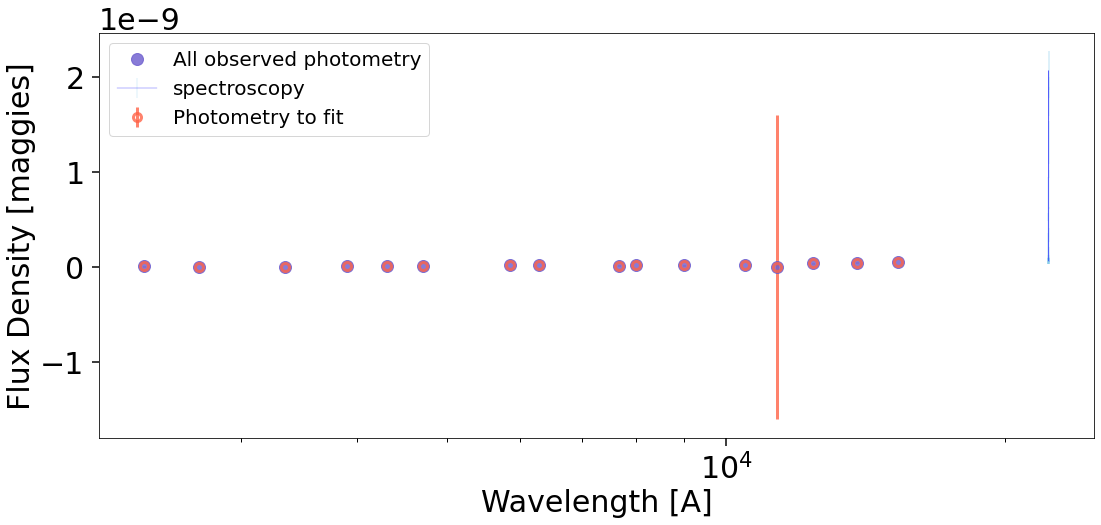

In [93]:
##And we will store some meta-parameters that control the input arguments to this method:
run_params = {}
# run_params["snr"] = 10.0

run_params["ldist"] = lum_dist
## Let's take a look at the final obs disctionary and also plot up our data.
# Build the obs dictionary using the meta-parameters
obs = build_obs(**run_params)

# Look at the contents of the obs dictionary
print("Obs Dictionary Keys:\n\n{}\n".format(obs.keys()))
print("--------\nFilter objects:\n")
print(obs["filters"])

# --- Plot the Data ----
# This is why we stored these...
wphot = obs["phot_wave"]

# establish bounds
xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
ymin, ymax = obs["maggies"].min()*0.8, obs["maggies"].max()/0.4
figure(figsize=(16,8))

# plot all the data
plot(wphot, obs['maggies'],
     label='All observed photometry',
     marker='o', markersize=12, alpha=0.8, ls='', lw=3,
     color='slateblue')

errorbar(obs["wavelength"], obs['spectrum'], yerr=obs['unc'],
     label='spectroscopy', alpha=1, ls='-', lw=0.3,
     color='blue', ecolor='skyblue')

# overplot only the data we intend to fit
mask = obs["phot_mask"]
errorbar(wphot[mask], obs['maggies'][mask], 
         yerr=obs['maggies_unc'][mask], 
         label='Photometry to fit',
         marker='o', markersize=8, alpha=0.8, ls='', lw=3,
         ecolor='tomato', markerfacecolor='none', markeredgecolor='tomato', 
         markeredgewidth=3)

# plot Filters
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    t = t / t.max()
    t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
    plot(w, t, lw=3, color='gray', alpha=0.7)

# prettify
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
# xlim([2000, xmax])
# xlim(2e4,5e4)
# ylim([2e-11,9e-11])
xscale("log")
# yscale("log")
legend(loc='best', fontsize=20)
tight_layout()

In [178]:
obs["maggies"]

# filternames

array([0.00000000e+00, 0.00000000e+00, 4.10788525e-11, 0.00000000e+00,
       1.35261918e-10, 1.54863498e-10, 1.90850194e-10, 1.90119180e-10,
       1.88018293e-10, 1.87170177e-10, 1.82597007e-10, 1.71028271e-10,
       0.00000000e+00, 1.90064440e-10, 1.91475194e-10, 1.76337999e-10,
       1.85557095e-10, 1.80125416e-10, 1.44024390e-10])

In [179]:
obs['spectrum']

array([1.62904553e-09, 1.61213850e-09, 1.59522504e-09, 1.57907088e-09,
       1.56214487e-09, 1.54521244e-09, 1.52827358e-09, 1.51209868e-09,
       1.49514726e-09, 1.47818941e-09, 1.46200340e-09, 1.44505408e-09,
       1.42812646e-09, 1.41125221e-09, 1.39523539e-09, 1.37861247e-09,
       1.36221546e-09, 1.34682476e-09, 1.33097525e-09, 1.31532743e-09,
       1.29969833e-09, 1.28457356e-09, 1.26827072e-09, 1.25134171e-09,
       1.23375095e-09, 1.21646038e-09, 1.19804235e-09, 1.17956449e-09,
       1.16206764e-09, 1.14401701e-09, 1.12636168e-09, 1.10933825e-09,
       1.09441625e-09, 1.08252964e-09, 1.08089987e-09, 1.10304526e-09,
       1.18268476e-09, 1.38173302e-09, 1.80550011e-09, 2.56039173e-09,
       3.89675835e-09, 5.95689176e-09, 8.66184921e-09, 1.21485535e-08,
       1.59305733e-08, 1.94054683e-08, 2.18035022e-08, 2.28122083e-08,
       2.20490346e-08, 1.96900073e-08, 1.64305438e-08, 1.26184228e-08,
       9.01744571e-09, 6.16298565e-09, 3.94146658e-09, 2.46392730e-09,
      

(array([ 3.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  2.,
         0.,  2.,  0.,  2.,  2., 28., 47.]),
 array([-2.26081839e-08, -2.14717949e-08, -2.03354059e-08, -1.91990169e-08,
        -1.80626279e-08, -1.69262389e-08, -1.57898499e-08, -1.46534609e-08,
        -1.35170719e-08, -1.23806829e-08, -1.12442939e-08, -1.01079049e-08,
        -8.97151592e-09, -7.83512692e-09, -6.69873792e-09, -5.56234893e-09,
        -4.42595993e-09, -3.28957093e-09, -2.15318193e-09, -1.01679294e-09,
         1.19596061e-10]),
 <BarContainer object of 20 artists>)

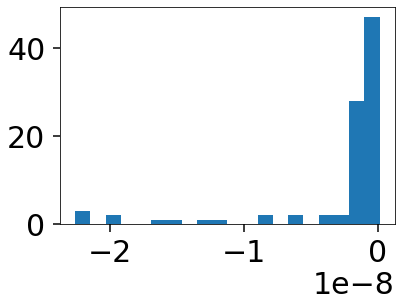

In [190]:
nbins,ndensity=np.histogram(obs["maggies"][-1]-obs['spectrum'], bins=20)
plt.hist(obs["maggies"][-1]-obs['spectrum'], bins=20)
# nbins
# max(np.abs(ndensity))
# ndensity

In [94]:
from prospect.models.templates import TemplateLibrary

# Look at all the prepackaged parameter sets
# TemplateLibrary.show_contents()

############### Non-parametric SFH:

# TemplateLibrary.describe("parametric_sfh")
# TemplateLibrary.describe("continuity_flex_sfh")
TemplateLibrary.describe("alpha")

Free Parameters: (name: prior) 
-----------
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)
  z_fraction: <class 'prospect.models.priors.Beta'>(mini=0.0,maxi=1.0,alpha=[5 4 3 2 1],beta=[1 1 1 1 1])
  total_mass: <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)
  duste_umin: <class 'prospect.models.priors.TopHat'>(mini=0.1,maxi=25)
  duste_qpah: <class 'prospect.models.priors.TopHat'>(mini=0.5,maxi=7.0)
  duste_gamma: <class 'prospect.models.priors.LogUniform'>(mini=0.001,maxi=0.15)
  fagn: <class 'prospect.models.priors.LogUniform'>(mini=1e-05,maxi=3.0)
  agn_tau: <class 'prospect.models.priors.LogUniform'>(mini=5.0,maxi=150.0)
  dust_ratio: <class 'prospect.models.priors.ClippedNormal'>(mean=1.0,sigma=0.3,mini=0.0,maxi=2.0)
  dust_index: <class 'prospect.models.priors.TopHat'>(mini=-2.0,maxi=0.5)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred

In [95]:
def build_model(object_redshift=zred, fixed_metallicity=None, add_duste=True, add_neb=True,
                **extras):
    """Build a prospect.models.SedModel object
    
    :param object_redshift: (optional, default: None)
        If given, produce spectra and observed frame photometry appropriate 
        for this redshift. Otherwise, the redshift will be zero.
        
    :param ldist: (optional, default: 10)
        The luminosity distance (in Mpc) for the model.  Spectra and observed 
        frame (apparent) photometry will be appropriate for this luminosity distance.
        
    :param fixed_metallicity: (optional, default: None)
        If given, fix the model metallicity (:math:`log(Z/Z_sun)`) to the given value.
        
    :param add_duste: (optional, default: False)
        If `True`, add dust emission and associated (fixed) parameters to the model.
        
    :returns model:
        An instance of prospect.models.SedModel
    """
    from prospect.models.sedmodel import SedModel
    from prospect.models.templates import TemplateLibrary
    from prospect.models import priors

    # Get (a copy of) one of the prepackaged model set dictionaries.
    # This is, somewhat confusingly, a dictionary of dictionaries, keyed by parameter name
    model_params = TemplateLibrary["alpha"]
    
   # Now add the lumdist parameter by hand as another entry in the dictionary.
   # This will control the distance since we are setting the redshift to zero.  
   # In `build_obs` above we used a distance of 10Mpc to convert from absolute to apparent magnitudes, 
   # so we use that here too, since the `maggies` are appropriate for that distance.
#     model_params["lumdist"] = {"N": 1, "isfree": False, "init": ldist, "units":"Mpc"}
    
    # Let's make some changes to initial values appropriate for our objects and data
    model_params["zred"]["init"] = zred
#     model_params["dust2"]["init"] = 0.34
    model_params["logzsol"]["init"] = -0.7  ## log (z/z_sun) for 0.2 z_sun=-0.7
#     model_params["tage"]["init"] = 3 ## age at z=zred[ind1] (which is 1.132)=5.4Gyr
    model_params["total_mass"]["init"] = np.power(10,log_mass_sh)  ## I set Shipley's mass as the initial guess.
    model_params["agn_tau"]["init"] =10 ## from python fsps default
    model_params["fagn"]["init"] =0  ## from python fsps default
       
    
    # These are dwarf galaxies, so lets also adjust the metallicity prior,
    # the tau parameter upward, and the mass prior downward
    model_params["dust2"]["prior"] = priors.TopHat(mini=0.0, maxi=2.0)
#     model_params["tau"]["prior"] = priors.LogUniform(mini=1e-1, maxi=1e2)
    model_params["total_mass"]["prior"] = priors.LogUniform(mini=1e7, maxi=5e10)
#     model_params["logzsol"]["prior"] = priors.TopHat(mini=-0.5, maxi=0.5)

    # If we are going to be using emcee, it is useful to provide a 
    # minimum scale for the cloud of walkers (the default is 0.1)
    model_params["total_mass"]["disp_floor"] = 7e7
#     model_params["tau"]["disp_floor"] = 1.0       
#     model_params["tage"]["disp_floor"] = 0.5
#     model_params["logzsol"]["disp_floor"] = 0.2
        
    ### Naj: I am adding one time bin for the SFH, 0-30 Myr,30-100Myr:
    
    
    agelims=np.array([0   , 7.47712125, 8., 8.47712125 , 9. ,  9.47712125 ,  9.77815125, 10.13353891]) ## If we add Halpha emission lines and want SFR over last 30 Myr.
#     agelims=np.array([0   , 8., 8.47712125 , 9. ,  9.47712125 ,  9.77815125, 10.13353891]) 
    a1=np.log10(age_universe*1e9)
    agelims=np.append(agelims[agelims<=a1],agelims[len(agelims[agelims<=a1])]) ## b/c at zred 2.39, universe age is 2.8 Gyr
    
    agebins = np.array([agelims[:-1], agelims[1:]]).T
    ncomp = len(agelims) - 1
    # constant SFR
    zinit = np.array([(i-1)/float(i) for i in range(ncomp, 1, -1)])

    # Set up the prior in `z` variables that corresponds to a dirichlet in sfr
    # fraction.  THIS IS IMPORTANT
    alpha = np.arange(ncomp-1, 0, -1)
    zprior = priors.Beta(alpha=alpha, beta=np.ones_like(alpha), mini=0.0, maxi=1.0)

    model_params['mass']['N'] = ncomp
    model_params['agebins']['N'] = ncomp
    model_params['agebins']['init'] = agebins
    model_params['z_fraction']['N'] = len(zinit)
    model_params['z_fraction']['init'] = zinit
    model_params['z_fraction']['prior'] = zprior
    
     ## Naj: I don't want agn :
    model_params["agn_tau"]["isfree"] = False
    model_params["fagn"]["isfree"] = False
    
    
    # Change the model parameter specifications based on some keyword arguments
    if fixed_metallicity is not None:
        # make it a fixed parameter
        model_params["logzsol"]["isfree"] = False
        #And use value supplied by fixed_metallicity keyword
        model_params["logzsol"]['init'] = fixed_metallicity 

    if object_redshift is not None:
        # make sure zred is fixed
        model_params["zred"]['isfree'] = False
        # And set the value to the object_redshift keyword
        model_params["zred"]['init'] = object_redshift

    if add_duste:
        # Add dust emission (with fixed dust SED parameters)
        # Since `model_params` is a dictionary of parameter specifications, 
        # and `TemplateLibrary` returns dictionaries of parameter specifications, 
        # we can just update `model_params` with the parameters described in the 
        # pre-packaged `dust_emission` parameter set.
        model_params.update(TemplateLibrary["dust_emission"])
        
    if add_neb:
        model_params.update(TemplateLibrary["nebular"])
        
    # Now instantiate the model object using this dictionary of parameter specifications
    model = SedModel(model_params)

    return model


run_params["object_redshift"] = zred
run_params["fixed_metallicity"] = None
run_params["add_duste"] = True
add_agn_dust= False
# run_params["nebemlininspec"]=True  ## To a

In [96]:
##Now let's build the model using this function and take a look at it:
model = build_model(**run_params)
print(model)
print("\nInitial free parameter vector theta:\n  {}\n".format(model.theta))
print("Initial parameter dictionary:\n{}".format(model.params))

def build_sps(zcontinuous=1, **extras):
    """
    :param zcontinuous: 
        A vlue of 1 insures that we use interpolation between SSPs to 
        have a continuous metallicity parameter (`logzsol`)
        See python-FSPS documentation for details
    """
    from prospect.sources import FastStepBasis
    sps = FastStepBasis(zcontinuous=zcontinuous)
    return sps

run_params["zcontinuous"] = 1

sps = build_sps(**run_params)
# help(sps.get_spectrum)

:::::::
<class 'prospect.models.sedmodel.SedModel'>

Free Parameters: (name: prior) 
-----------
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  z_fraction: <class 'prospect.models.priors.Beta'>(mini=0.0,maxi=1.0,alpha=[4 3 2 1],beta=[1 1 1 1])
  total_mass: <class 'prospect.models.priors.LogUniform'>(mini=10000000.0,maxi=50000000000.0)
  dust_ratio: <class 'prospect.models.priors.ClippedNormal'>(mean=1.0,sigma=0.3,mini=0.0,maxi=2.0)
  dust_index: <class 'prospect.models.priors.TopHat'>(mini=-2.0,maxi=0.5)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: [2.3937] 
  mass: [1.] <function zfrac_to_masses at 0x7fd22958d280>
  sfh: [3] 
  imf_type: [2] 
  dust_type: [4] 
  agebins: [[0.         7.47712125]
 [7.47712125 8.        ]
 [8.         8.47712125]
 [8.47712125 9.        ]
 [9.         9.47712125]] 
  add_dust_emission: [ True] 
  duste_umin: [1.] 
  duste_qpah: [4.] 
  du

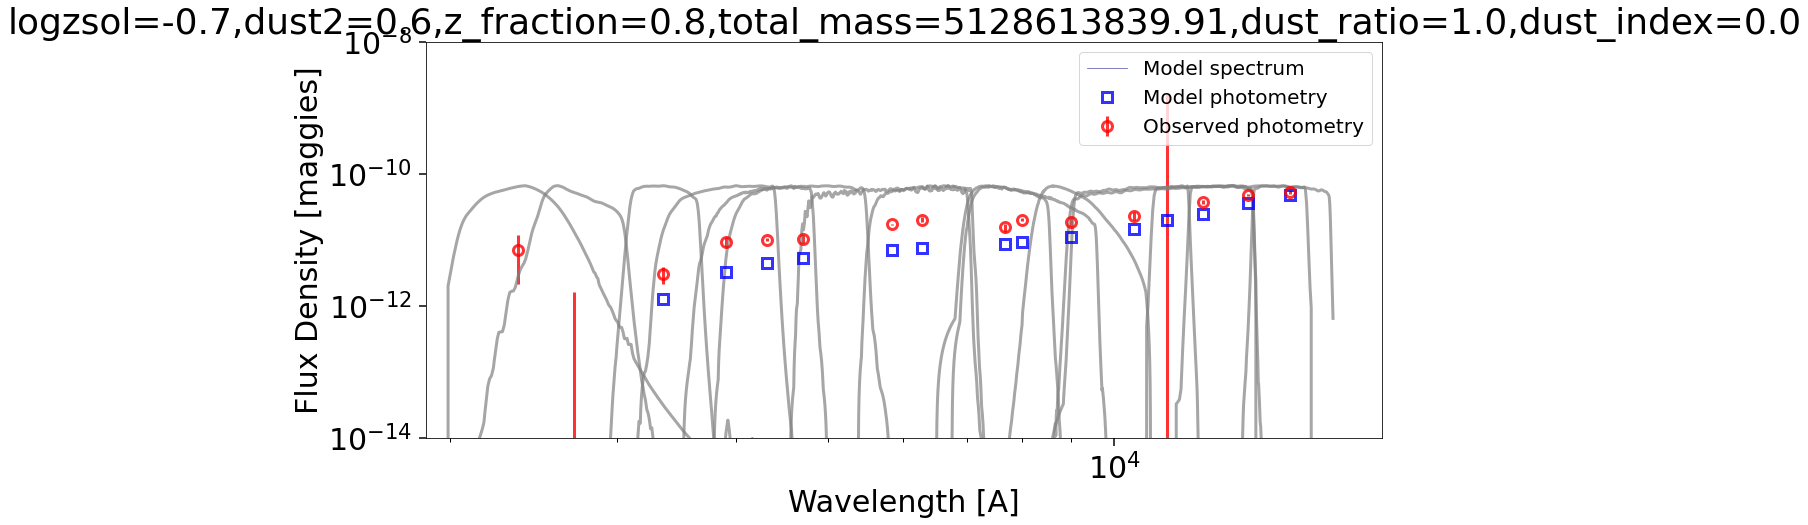

In [97]:
# obs['wavelength']=sps.wavelengths

# Generate the model SED at the initial value of theta
theta = model.theta.copy()
initial_spec, initial_phot, initial_mfrac = model.sed(theta, obs=obs, sps=sps)
title_text = ','.join(["{}={}".format(p, np.around(model.params[p][0],2)) 
                       for p in model.free_params])

a = 1.0 + model.params.get('zred', zred) # cosmological redshifting
# photometric effective wavelengths
wphot = obs["phot_wave"]
# spectroscopic wavelengths
if obs["wavelength"] is None:
    # *restframe* spectral wavelengths, since obs["wavelength"] is None
    wspec = sps.wavelengths
    wspec *= a #redshift them
else:
    wspec = obs["wavelength"]

# establish bounds
xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, initial_spec)
ymin, ymax = temp.min()*0.8, temp.max()/0.4
figure(figsize=(16,8))

# plot model + data
loglog(wspec, initial_spec, label='Model spectrum', 
       lw=0.7, color='navy', alpha=0.7)
errorbar(wphot, initial_phot, label='Model photometry', 
         marker='s',markersize=10, alpha=0.8, ls='', lw=3,
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], 
         label='Observed photometry',
         marker='o', markersize=10, alpha=0.8, ls='', lw=3,
         ecolor='red', markerfacecolor='none', markeredgecolor='red', 
         markeredgewidth=3)
title(title_text)

# plot Filters
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    t = t / t.max()
    t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
    loglog(w, t, lw=3, color='gray', alpha=0.7)

# prettify
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([1e-14, 1e-8])
legend(loc='best', fontsize=20)
tight_layout()


In [98]:
verbose = False
def lnprobfn(theta, model=None, obs=None, sps=None, 
             nested=False, verbose=verbose):
    """
    Given a parameter vector, a model, a dictionary of observational 
    data, and an sps object, return the ln of the posterior. 
    """

    # Calculate prior probability and exit if not within prior
    # Also if doing nested sampling, do not include the basic priors, 
    # since the drawing method includes the prior probability
    lnp_prior = model.prior_product(theta, nested=nested)
    if not np.isfinite(lnp_prior):
        return -np.infty
        
    # Generate "mean" model
    spec, phot, mfrac = model.mean_model(theta, obs, sps=sps)
 
    # Calculate likelihoods
    lnp_spec = lnlike_spec(spec, obs=obs)
    lnp_phot = lnlike_phot(phot, obs=obs)

    return lnp_prior + lnp_phot + lnp_spec

run_params["verbose"] = verbose

def chivecfn(theta):
    """A version of lnprobfn that returns the simple uncertainty 
    normalized residual instead of the log-posterior, for use with 
    least-squares optimization methods like Levenburg-Marquardt.
    
    It's important to note that the returned chi vector does not 
    include the prior probability.
    """
    lnp_prior = model.prior_product(theta)
    if not np.isfinite(lnp_prior):
        return np.zeros(model.ndim) - np.infty

    # Generate mean model
    try:
        spec, phot, x = model.mean_model(theta, obs, sps=sps)
    except(ValueError):
        return np.zeros(model.ndim) - np.infty

    chispec = chi_spec(spec, obs)
    chiphot = chi_phot(phot, obs)
    return np.concatenate([chispec, chiphot])

from prospect.fitting import lnprobfn
# help(lnprobfn)

In [99]:
# Here we will run all our building functions
obs = build_obs(**run_params)
sps = build_sps(**run_params)
model = build_model(**run_params)

# For fsps based sources it is useful to 
# know which stellar isochrone and spectral library
# we are using
print(sps.ssp.libraries)

from prospect.fitting import fit_model
# help(fit_model)

(b'pdva', b'miles')


In [54]:
# --- start minimization ----
run_params["dynesty"] = False
run_params["emcee"] = False
run_params["optimize"] = True
run_params["min_method"] = 'lm'
# We'll start minimization from "nmin" separate places, 
# the first based on the current values of each parameter and the 
# rest drawn from the prior.  Starting from these extra draws 
# can guard against local minima, or problems caused by 
# starting at the edge of a prior (e.g. dust2=0.0)
run_params["nmin"] = 2

output = fit_model(obs, model, sps, lnprobfn=lnprobfn, **run_params)

print("Done optmization in {}s".format(output["optimization"][1]))

/Users/najmehemami/opt/anaconda3/envs/prospector_env/lib/python3.8/site-packages/prospect-0.4.0-py3.8.egg/prospect/models/priors.py:104: RuntimeWarning: divide by zero encountered in log


Done optmization in 24.919209957122803s


[-1.13949269e+00  5.47297230e-01  7.84687156e-01  5.88077919e-01
  4.35206901e-01  4.74664871e+09  1.99999995e+00  4.77182594e-01]
0
[-1.13949269e+00  5.47297230e-01  7.84687156e-01  5.88077919e-01
  4.35206901e-01  4.74664871e+09  1.99999995e+00  4.77182594e-01]


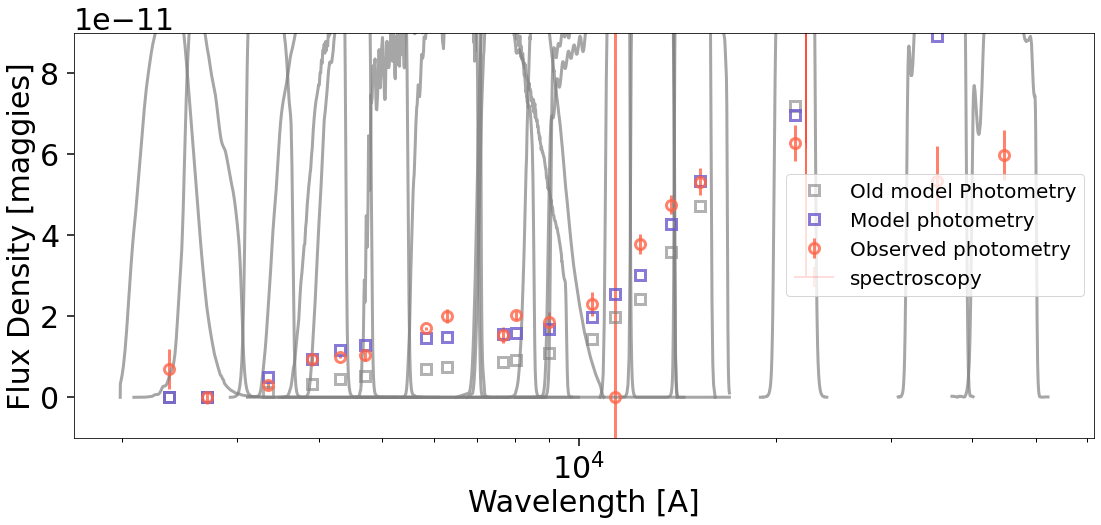

In [55]:
#View model after minimization
# obs["wavelength"]=None
# wspec = sps.wavelengths

print(model.theta)
(results, topt) = output["optimization"]
# Find which of the minimizations gave the best result, 
# and use the parameter vector for that minimization
ind_best = np.argmin([r.cost for r in results])
print(ind_best)
theta_best = results[ind_best].x.copy()
print(theta_best)

# generate model
prediction = model.mean_model(theta_best, obs=obs, sps=sps)
pspec, pphot, pfrac = prediction

figure(figsize=(16,8))

# plot Data, best fit model, and old models
# plot(wspec, initial_spec, label='Old model spectrum',
#        lw=0.7, color='gray', alpha=0.5)
errorbar(wphot, initial_phot, label='Old model Photometry', 
         marker='s', markersize=10, alpha=0.6, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='gray', 
         markeredgewidth=3)
# plot(wspec, pspec, label='Model spectrum', 
#        lw=0.7, color='slateblue', alpha=0.9)
errorbar(wphot, pphot, label='Model photometry', 
         marker='s', markersize=10, alpha=0.8, ls='', lw=3,
         markerfacecolor='none', markeredgecolor='slateblue', 
         markeredgewidth=3)
# plot(wspec, obs['spectrum'], label='Observed spectrum', 
#        lw=0.7, color='red', alpha=0.7)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'],
         label='Observed photometry', 
         marker='o', markersize=10, alpha=0.8, ls='', lw=3, 
         ecolor='tomato', markerfacecolor='none', markeredgecolor='tomato', 
         markeredgewidth=3)

errorbar(spec_wave, flux_maggie_spec, yerr=err_maggie_spec,
     label='spectroscopy', alpha=0.9, ls='-', lw=0.3,
     color='red', ecolor='tomato')

# plot filter transmission curves
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    t = t / t.max()
    t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
    plot(w, t, lw=3, color='gray', alpha=0.7)

# axvline(x=4*(1+zred), ls='dashed')    
# Prettify
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
# xlim([xmin, xmax])
ylim([-1e-11, 9e-11])
xscale('log')
legend(loc='best', fontsize=20)
tight_layout()

In [ ]:
#Sampling the Posterior: Ensemble sampling using emcee
# Set this to False if you don't want to do another optimization
# before emcee sampling (but note that the "optimization" entry 
# in the output dictionary will be (None, 0.) in this case)
# If set to true then another round of optmization will be performed 
# before sampling begins and the "optmization" entry of the output
# will be populated.
run_params["optimize"] = False
run_params["emcee"] = True
run_params["dynesty"] = False
# Number of emcee walkers
run_params["nwalkers"] = 128
# Number of iterations of the MCMC sampling
run_params["niter"] = 512
# Number of iterations in each round of burn-in
# After each round, the walkers are reinitialized based on the 
# locations of the highest probablity half of the walkers.
run_params["nburn"] = [16, 32, 64]

#Let's go ahead and start sampling! (This should take of order 10 minutes):
# obs["wavelength"] = spec_wave
output = fit_model(obs, model, sps, lnprobfn=lnprobfn, **run_params)
print('done emcee in {0}s'.format(output["sampling"][1]))

/Users/najmehemami/opt/anaconda3/envs/prospector_env/lib/python3.8/site-packages/prospect-0.4.0-py3.8.egg/prospect/models/priors.py:104: RuntimeWarning: divide by zero encountered in log
/Users/najmehemami/opt/anaconda3/envs/prospector_env/lib/python3.8/site-packages/prospect-0.4.0-py3.8.egg/prospect/fitting/ensemble.py:449: RuntimeWarning: covariance is not positive-semidefinite.


In [77]:
import subprocess
from prospect.io import write_results as writer

obj_name=str(cluster)+'_'+str(spec_id)
# obj_name='4939_m0717_w_spec'

hfile = "8_"+obj_name+"_demo_mcmc.h5"
try:
    writer.write_hdf5(hfile, run_params, model, obs,
                  output["sampling"][0], output["optimization"][0],
                  tsample=output["sampling"][1],
                  toptimize=output["optimization"][1])
except RuntimeError:
    subprocess.check_call(['rm', hfile ])
    writer.write_hdf5(hfile, run_params, model, obs,
                  output["sampling"][0], output["optimization"][0],
                  tsample=output["sampling"][1],
                  toptimize=output["optimization"][1])

print('Finished')

from prospect import prospect_args
# - Parser with default arguments -
parser = prospect_args.get_parser()
# - Add custom arguments -
parser.add_argument('--add_duste', action="store_true",
                    help="If set, add dust emission to the model.")
parser.add_argument('--ldist', type=float, default=10,
                    help=("Luminosity distance in Mpc. Defaults to 10"
                          "(for case of absolute mags)"))
args, _ = parser.parse_known_args()
cli_run_params = vars(args)
print(cli_run_params)

Appending current time (20Sep16-00.04) to output file in order to guarantee a unique name.
New output filename: 8_M0717_3958.0_demo_mcmc_20Sep16-00.04.h5
Finished
{'verbose': 1, 'debug': False, 'outfile': 'prospector_test_run', 'output_pickle': False, 'zcontinuous': 1, 'optimize': False, 'min_method': 'lm', 'min_opts': {}, 'nmin': 1, 'emcee': False, 'nwalkers': 64, 'niter': 512, 'nburn': [16, 32, 64], 'interval': 0.2, 'restart_from': '', 'initial_disp': 0.1, 'dynesty': False, 'nested_bound': 'multi', 'nested_method': 'slice', 'nested_nlive_init': 100, 'nested_nlive_batch': 100, 'nested_dlogz_init': 0.05, 'nested_maxcall': 50000000, 'nested_maxiter': 1000000, 'nested_maxbatch': 10, 'nested_bootstrap': 0, 'nested_posterior_thresh': 0.05, 'add_duste': False, 'ldist': 10}


/Users/najmehemami/opt/anaconda3/envs/prospector_env/lib/python3.8/site-packages/prospect-0.4.0-py3.8.egg/prospect/io/write_results.py:60: RuntimeWarning: Could not store paramfile text
/Users/najmehemami/opt/anaconda3/envs/prospector_env/lib/python3.8/site-packages/prospect-0.4.0-py3.8.egg/prospect/io/write_results.py:290: RuntimeWarning: Could not JSON serialize run_params, pickled instead
/Users/najmehemami/opt/anaconda3/envs/prospector_env/lib/python3.8/site-packages/prospect-0.4.0-py3.8.egg/prospect/io/write_results.py:290: RuntimeWarning: Could not JSON serialize model_params, pickled instead


In [78]:
obj_name

'M0717_3958.0'

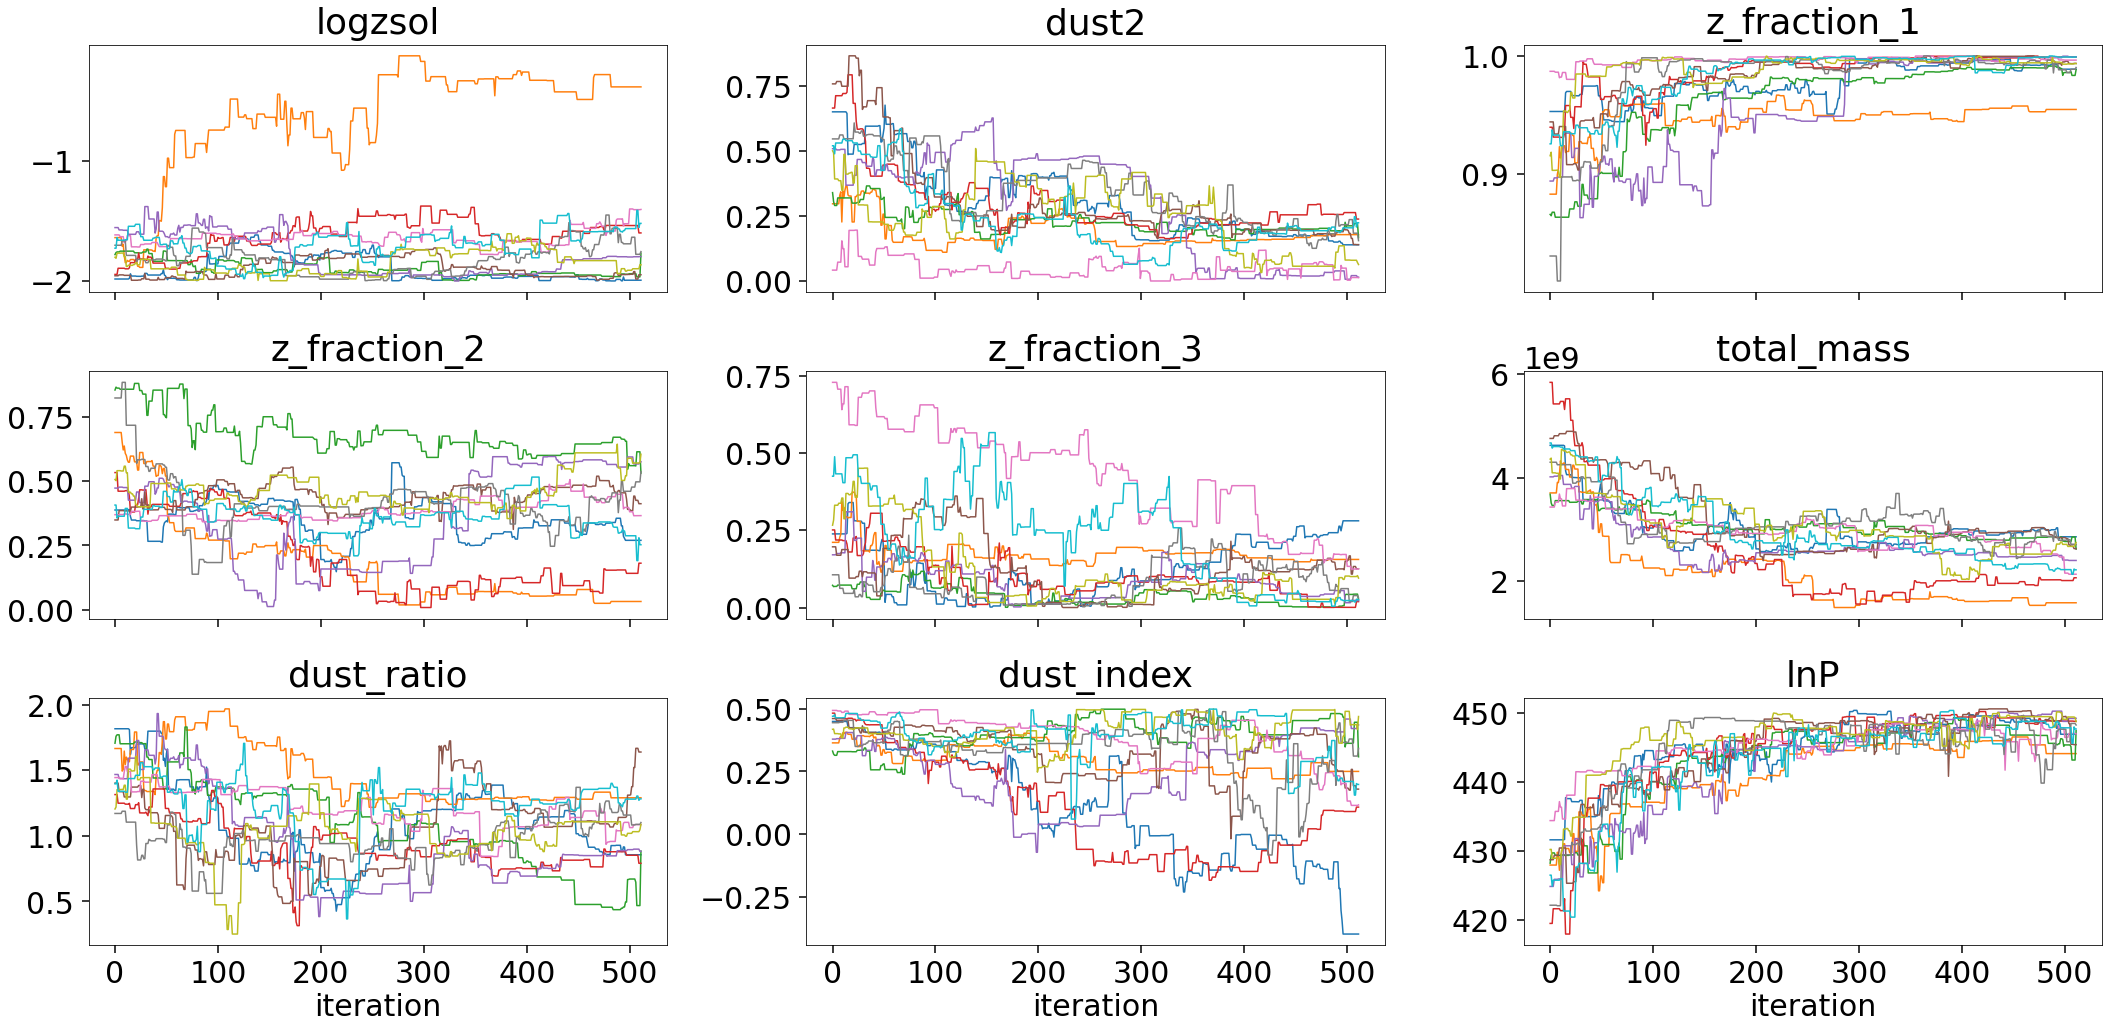

In [79]:
import prospect.io.read_results as reader
results_type = "emcee"
# cluster='A1689'
# spec_id=523.0
obj_name=str(cluster)+'_'+str(spec_id)
result2, obs2, _ = reader.results_from("8_"+obj_name+"_demo_mcmc.h5".format(results_type), dangerous=False)
if results_type == "emcee":
    chosen = np.random.choice(result2["run_params"]["nwalkers"], size=10, replace=False)
    tracefig = reader.traceplot(result2, figsize=(30,15), chains=chosen)
else:
    tracefig = reader.traceplot(result2, figsize=(30,15))

plt.tight_layout()
plt.savefig('8_mcmc_'+obj_name+'.jpg')

MAP value: [-1.69811220e+00  5.69153677e-02  9.99042893e-01  3.13048541e-01
  6.63086528e-02  2.08145345e+09  8.59438606e-01 -4.50298842e-01]


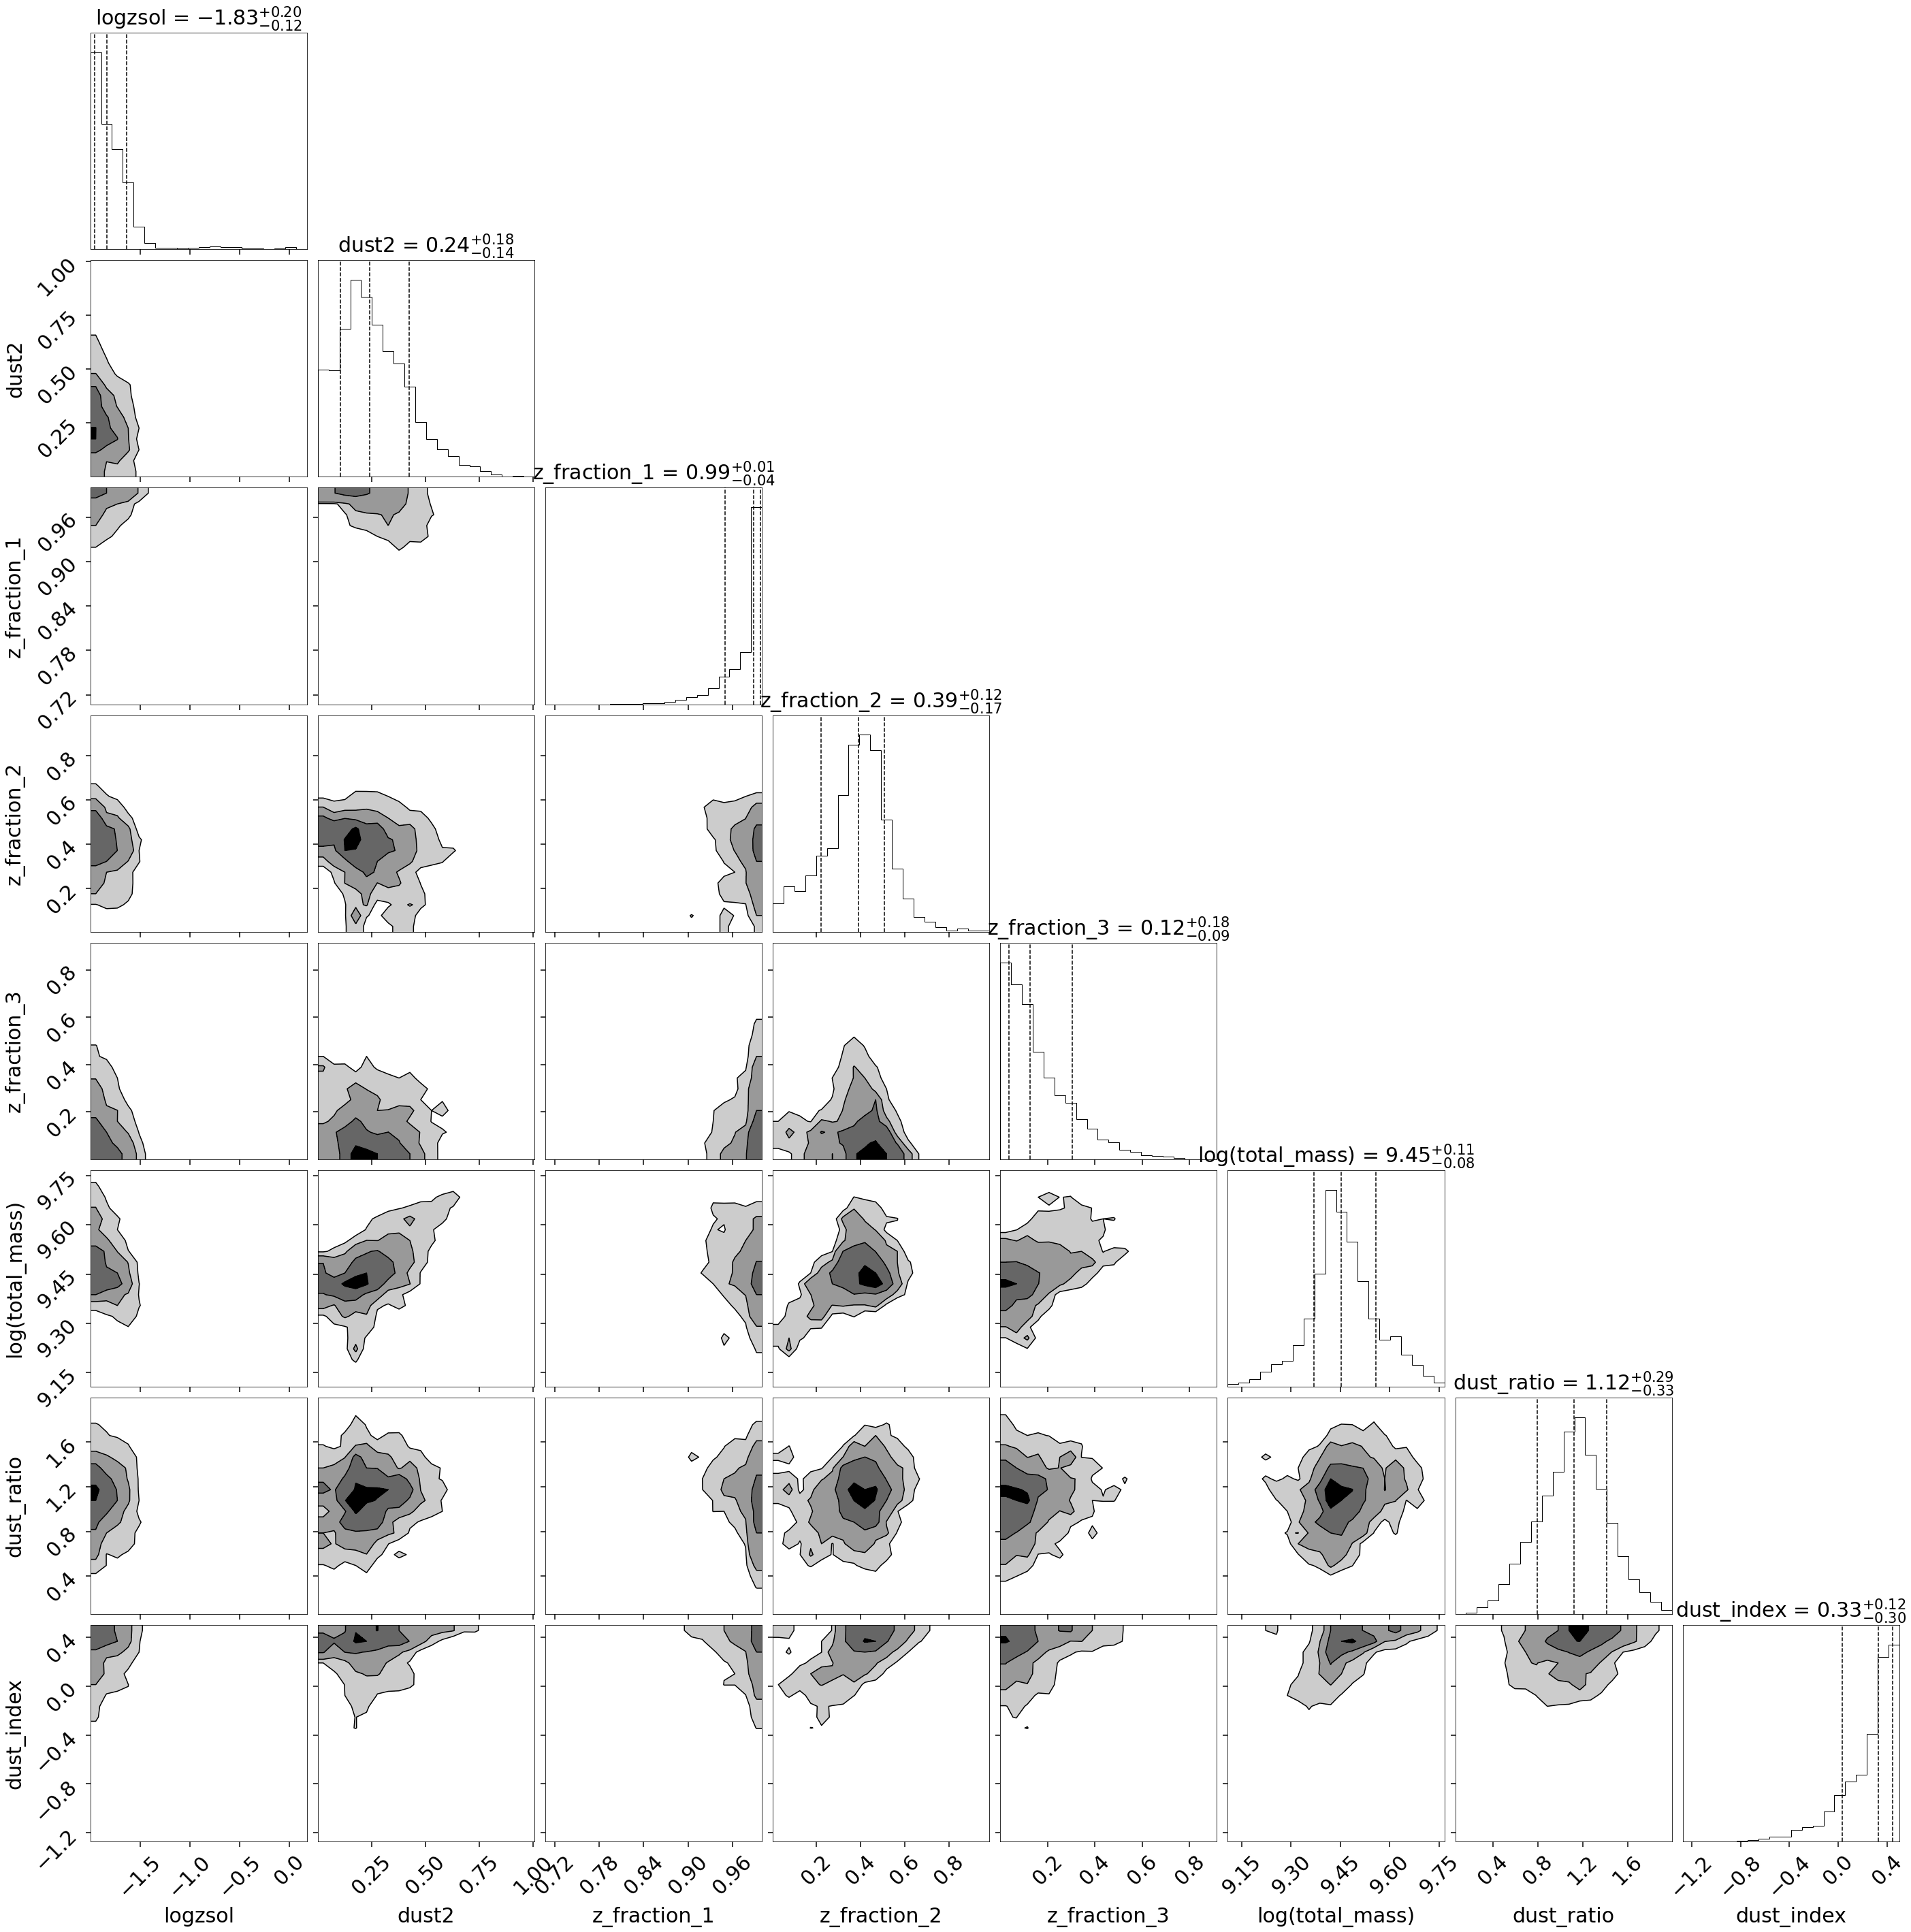

In [80]:
imax2 = np.argmax(result2['lnprobability'])
if results_type == "emcee":
    i, j = np.unravel_index(imax2, result2['lnprobability'].shape)
    theta_max2 = result2['chain'][i, j, :].copy()
    thin = 5
else:
    theta_max2 = result2["chain"][imax2, :]
    thin = 1

# print('Optimization value: {}'.format(theta_best))  ### best-fit value from Xi^2 minimization (Blue lines)
print('MAP value: {}'.format(theta_max2))
cornerfig = reader.subcorner(result2, start=0, thin=thin, 
                            fig=subplots(len(result2['theta_labels']),len(result2['theta_labels']),figsize=(40,40))[0], title_kwargs={"fontsize": 30},logify=["total_mass"])

# figure.gca().annotate(obj_name, textcoords="offset points",
#                       ha="right", va="top")

# plt.title(obj_name)
# plt.tight_layout()
plt.savefig('8_cornerplot_'+obj_name+'.jpg')

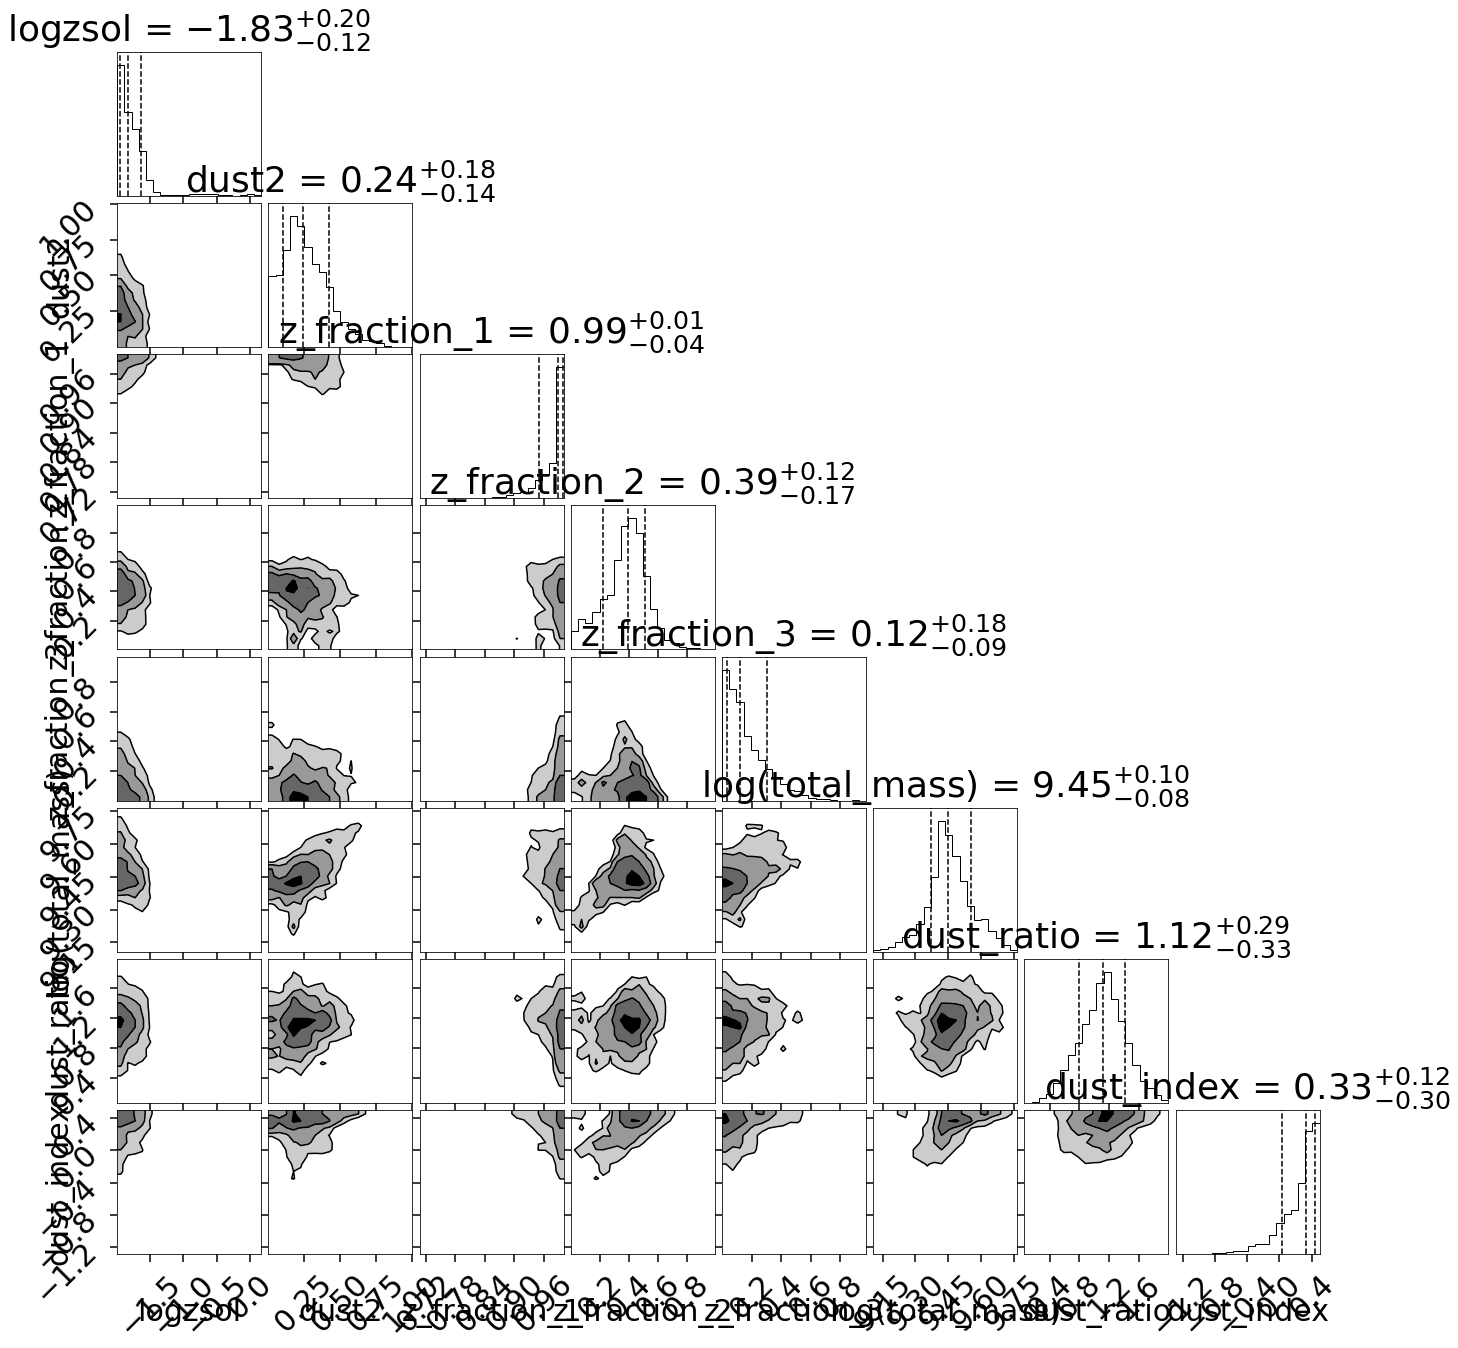

In [81]:
# def subcorner2(results, showpars=None, truths=None,
#               start=0, thin=1, chains=slice(None),
#               logify=["mass", "tau"], **kwargs):
"""Make a triangle plot of the (thinned, latter) samples of the posterior
parameter space.  Optionally make the plot only for a supplied subset of
the parameters.
:param showpars: (optional)
    List of string names of parameters to include in the corner plot.
:param truths: (optional)
    List of truth values for the chosen parameters.
:param start: (optional, default: 0)
    The iteration number to start with when drawing samples to plot.
:param thin: (optional, default: 1)
    The thinning of each chain to perform when drawing samples to plot.
:param chains: (optional)
    If results are from an ensemble sampler, setting `chain` to an integer
    array of walker indices will cause only those walkers to be used in
    generating the plot.  Useful for emoving stuck walkers.
:param kwargs:
    Remaining keywords are passed to the ``corner`` plotting package.
:param logify:
    A list of parameter names to plot in `log10(parameter)` instead of
    `parameter`
"""
parnames=result2['theta_labels']
showpars=None
truths=None
start=0
thin=1
chains=slice(None)
logify=["total_mass", "tau"]
# logify=[ "tau"]
try:
    import corner as triangle
except(ImportError):
    import triangle
except:
    raise ImportError("Please install the `corner` package.")

# pull out the parameter names and flatten the thinned chains
# Get parameter names
try:
    parnames = np.array(result2['theta_labels'], dtype='U20')
except(KeyError):
    parnames = np.array(result2['model'].theta_labels())
# Restrict to desired parameters
if showpars is not None:
    ind_show = np.array([parnames.tolist().index(p) for p in showpars])
    parnames = parnames[ind_show]
else:
    ind_show = slice(None)

# Get the arrays we need (trace, wghts)
trace = result2['chain'][..., ind_show]
if trace.ndim == 2:
    trace = trace[None, :]
trace = trace[chains, start::thin, :]
wghts = result2.get('weights', None)
if wghts is not None:
    wghts = wghts[start::thin]
samples = trace.reshape(trace.shape[0] * trace.shape[1], trace.shape[2])

# logify some parameters
xx = samples.copy()
if truths is not None:
    xx_truth = np.array(truths).copy()
else:
    xx_truth = None
for p in logify:
    if p in parnames:
        idx = parnames.tolist().index(p)
        xx[:, idx] = np.log10(xx[:, idx])
        parnames[idx] = "log({})".format(parnames[idx])
        if truths is not None:
            xx_truth[idx] = np.log10(xx_truth[idx])

# mess with corner defaults
corner_kwargs = {"plot_datapoints": False, "plot_density": False,
                 "fill_contours": True, "show_titles": True}
# corner_kwargs.update(kwargs)

fig = triangle.corner(xx, labels=parnames, truths=xx_truth,
                      quantiles=[0.16, 0.5, 0.84], weights=wghts, plot_datapoints= False, plot_density= False,
                     fill_contours= True, show_titles= True)

# figure.gca().annotate("a demo corner plot",
#                       xy=(1.0, 1.0), xycoords="figure fraction",
#                       xytext=(-20, -10), textcoords="offset points",
#                       ha="right", va="top")

In [82]:
## To print and save the best fit values and the errors in the excel file:

for i in range(len(result2['theta_labels'])): 
    q_16, q_50, q_84 = triangle.quantile(xx[:,i], [0.16, 0.5, 0.84]) # your x is q_50
    dx_down, dx_up = q_50-q_16, q_84-q_50
    print(np.around(q_50,2), np.around(dx_up,2), np.around(dx_down,2))
    
    
def best_vals(result_list, param_order):
    q_16, q_50, q_84 = triangle.quantile(result_list[:,param_order], [0.16, 0.5, 0.84]) # your x is q_50
    dx_down, dx_up = q_50-q_16, q_84-q_50
    return (np.around(q_50,2), np.around(dx_up,2), np.around(dx_down,2))
    

-1.83 0.2 0.12
0.24 0.18 0.14
0.99 0.01 0.04
0.39 0.12 0.17
0.12 0.18 0.09
9.45 0.1 0.08
1.12 0.29 0.33
0.33 0.12 0.3


In [75]:
result2['theta_labels']

array(['z_fraction_1', 'z_fraction_2', 'z_fraction_3', 'fagn',
       'dust_index', 'total_mass', 'dust_ratio', 'agn_tau', 'logzsol',
       'dust2'], dtype='<U12')

In [83]:
for i in range(len(result2['theta_labels'])):
    print (result2['theta_labels'][i], best_vals(xx,i)[0] )

    
result2['theta_labels']=np.array(result2['theta_labels'])
for i in range(len(result2['theta_labels'])):
    print ( best_vals(xx,result2['theta_labels'][i]== result2['theta_labels'])[0] )
    

logzsol -1.83
dust2 0.24
z_fraction_1 0.99
z_fraction_2 0.39
z_fraction_3 0.12
total_mass 9.45
dust_ratio 1.12
dust_index 0.33
-1.83
0.24
0.99
0.39
0.12
9.45
1.12
0.33


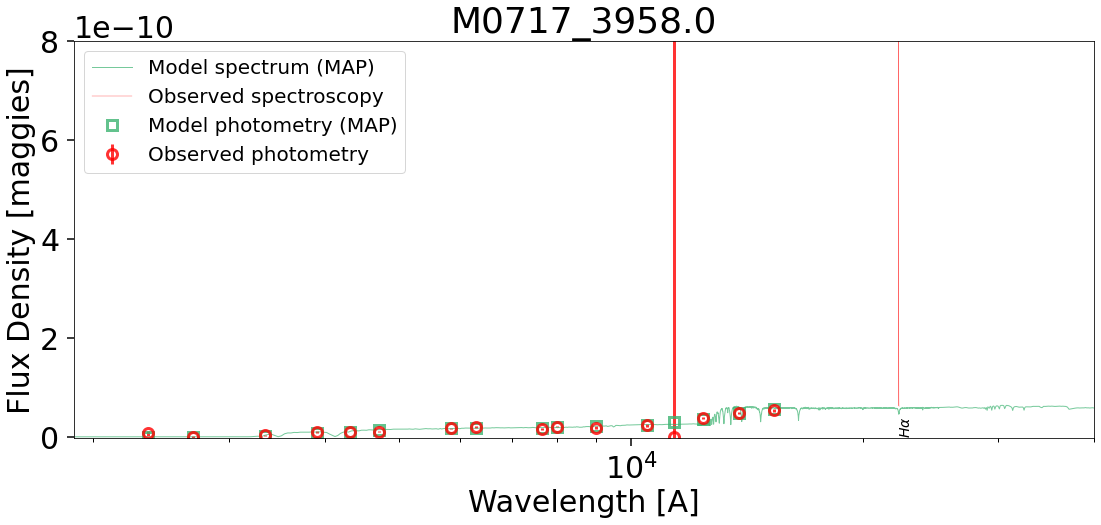

In [85]:
obs["wavelength"]=None
wspec = sps.wavelengths


randint = np.random.randint
if results_type == "emcee":
    nwalkers2, niter2 = result2['run_params']['nwalkers'], result2['run_params']['niter']
    theta = result2['chain'][randint(nwalkers2), randint(niter2)]

else:
    theta = result2["chain"][randint(len(result2["chain"]))]

# generate models
# sps = reader.get_sps(result2)  # this works if using parameter files
mspec, mphot, mextra = model.mean_model(theta, obs, sps=sps)
mspec_map, mphot_map, _ = model.mean_model(theta_max2, obs, sps=sps)

# Make plot of data and model
figure(figsize=(16,8))

# plot(wspec, mspec, label='Model spectrum (random draw)',
#        lw=0.7, color='navy', alpha=0.7)
plot(wspec * (1 + model.params["zred"]), mspec_map, label='Model spectrum (MAP)',
       lw=1, color='mediumseagreen', alpha=0.7)
# errorbar(wphot, mphot, label='Model photometry (random draw)',
#          marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
#          markerfacecolor='none', markeredgecolor='blue', 
#          markeredgewidth=3)
errorbar(wphot, mphot_map, label='Model photometry (MAP)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='mediumseagreen', 
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], 
         label='Observed photometry', ecolor='red', 
         marker='o', markersize=10, ls='', lw=3, alpha=0.8, 
         markerfacecolor='none', markeredgecolor='red', 
         markeredgewidth=3)

# axvline(x=(zred+1)*4340)
# axvline(x=(zred+1)*5007, ymin=4e-10, ymax=8e-10)
# axvline(x=(zred+1)*6563)
# text((zred+1)*4341, 0.4e-11, r'$H\gamma$', rotation='vertical', fontsize=14)
# text((zred+1)*4862, 0.4e-11, r'$H\beta$', rotation='vertical', fontsize=14)
text((zred+1)*6563, 0.4e-11, r'$H\alpha$', rotation='vertical', fontsize=14)

# errorbar(spec_wave, flux_maggie_spec, yerr=err_maggie_spec,
#      label='Observed spectroscopy', alpha=1, ls='-', lw=0.3,
#      color='red', ecolor='tomato')

plot(spec_wave, flux_maggie_spec,
     label='Observed spectroscopy', alpha=1, ls='-', lw=0.3,
     color='red')


# plot transmission curves
# for f in obs['filters']:
#     w, t = f.wavelength.copy(), f.transmission.copy()
#     t = t / t.max()
#     t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
#     plot(w, t*1e4, lw=1, color='gray', alpha=0.7)

xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, 4e4])
ylim([-0.2e-11, 8e-10])
plt.title(obj_name)
# xlim([2.21e4,2.24e4])
# xlim([(zred+1)*4341 -200, (zred+1)*4363+200])
# xlim([(zred+1)*6563 -200, (zred+1)*6563+200])
# xlim([(zred+1)*4862 -200, (zred+1)*4862+200])
# ylim([-0.2e-10, 2.5e-8])
# xlim([2e4,3.0e4])
xscale('log')
legend(loc=2, fontsize=20)
tight_layout()

# plt.savefig('8_spectra_'+obj_name+'.jpg')
# plt.savefig('8_spectra_Ha'+obj_name+'.jpg')

In [263]:
zred

2.5424652

In [34]:
obs['maggies']

array([ 4.9697556e-13,  3.2663097e-13,  3.4634110e-12,  6.6197126e-12,
        7.1115609e-12,  6.5924870e-12,  6.1004162e-12,  5.8967219e-12,
       -2.6546056e+18, -2.6546056e+18], dtype=float32)

In [87]:
## Save the best model spectra (wavelength [A], flux [maggies]) in a text file:
f1out=np.column_stack((wspec,mspec_map))

np.savetxt('8_1_'+obj_name+'_with_spitzer.txt',f1out, fmt=('%.3e', '%.3e'), delimiter=' ', newline='\n', header='wavelength[A], flux density [maggies]')

[0.99 0.03 0.78] [0.   0.07 0.14] [0.   0.02 0.16]


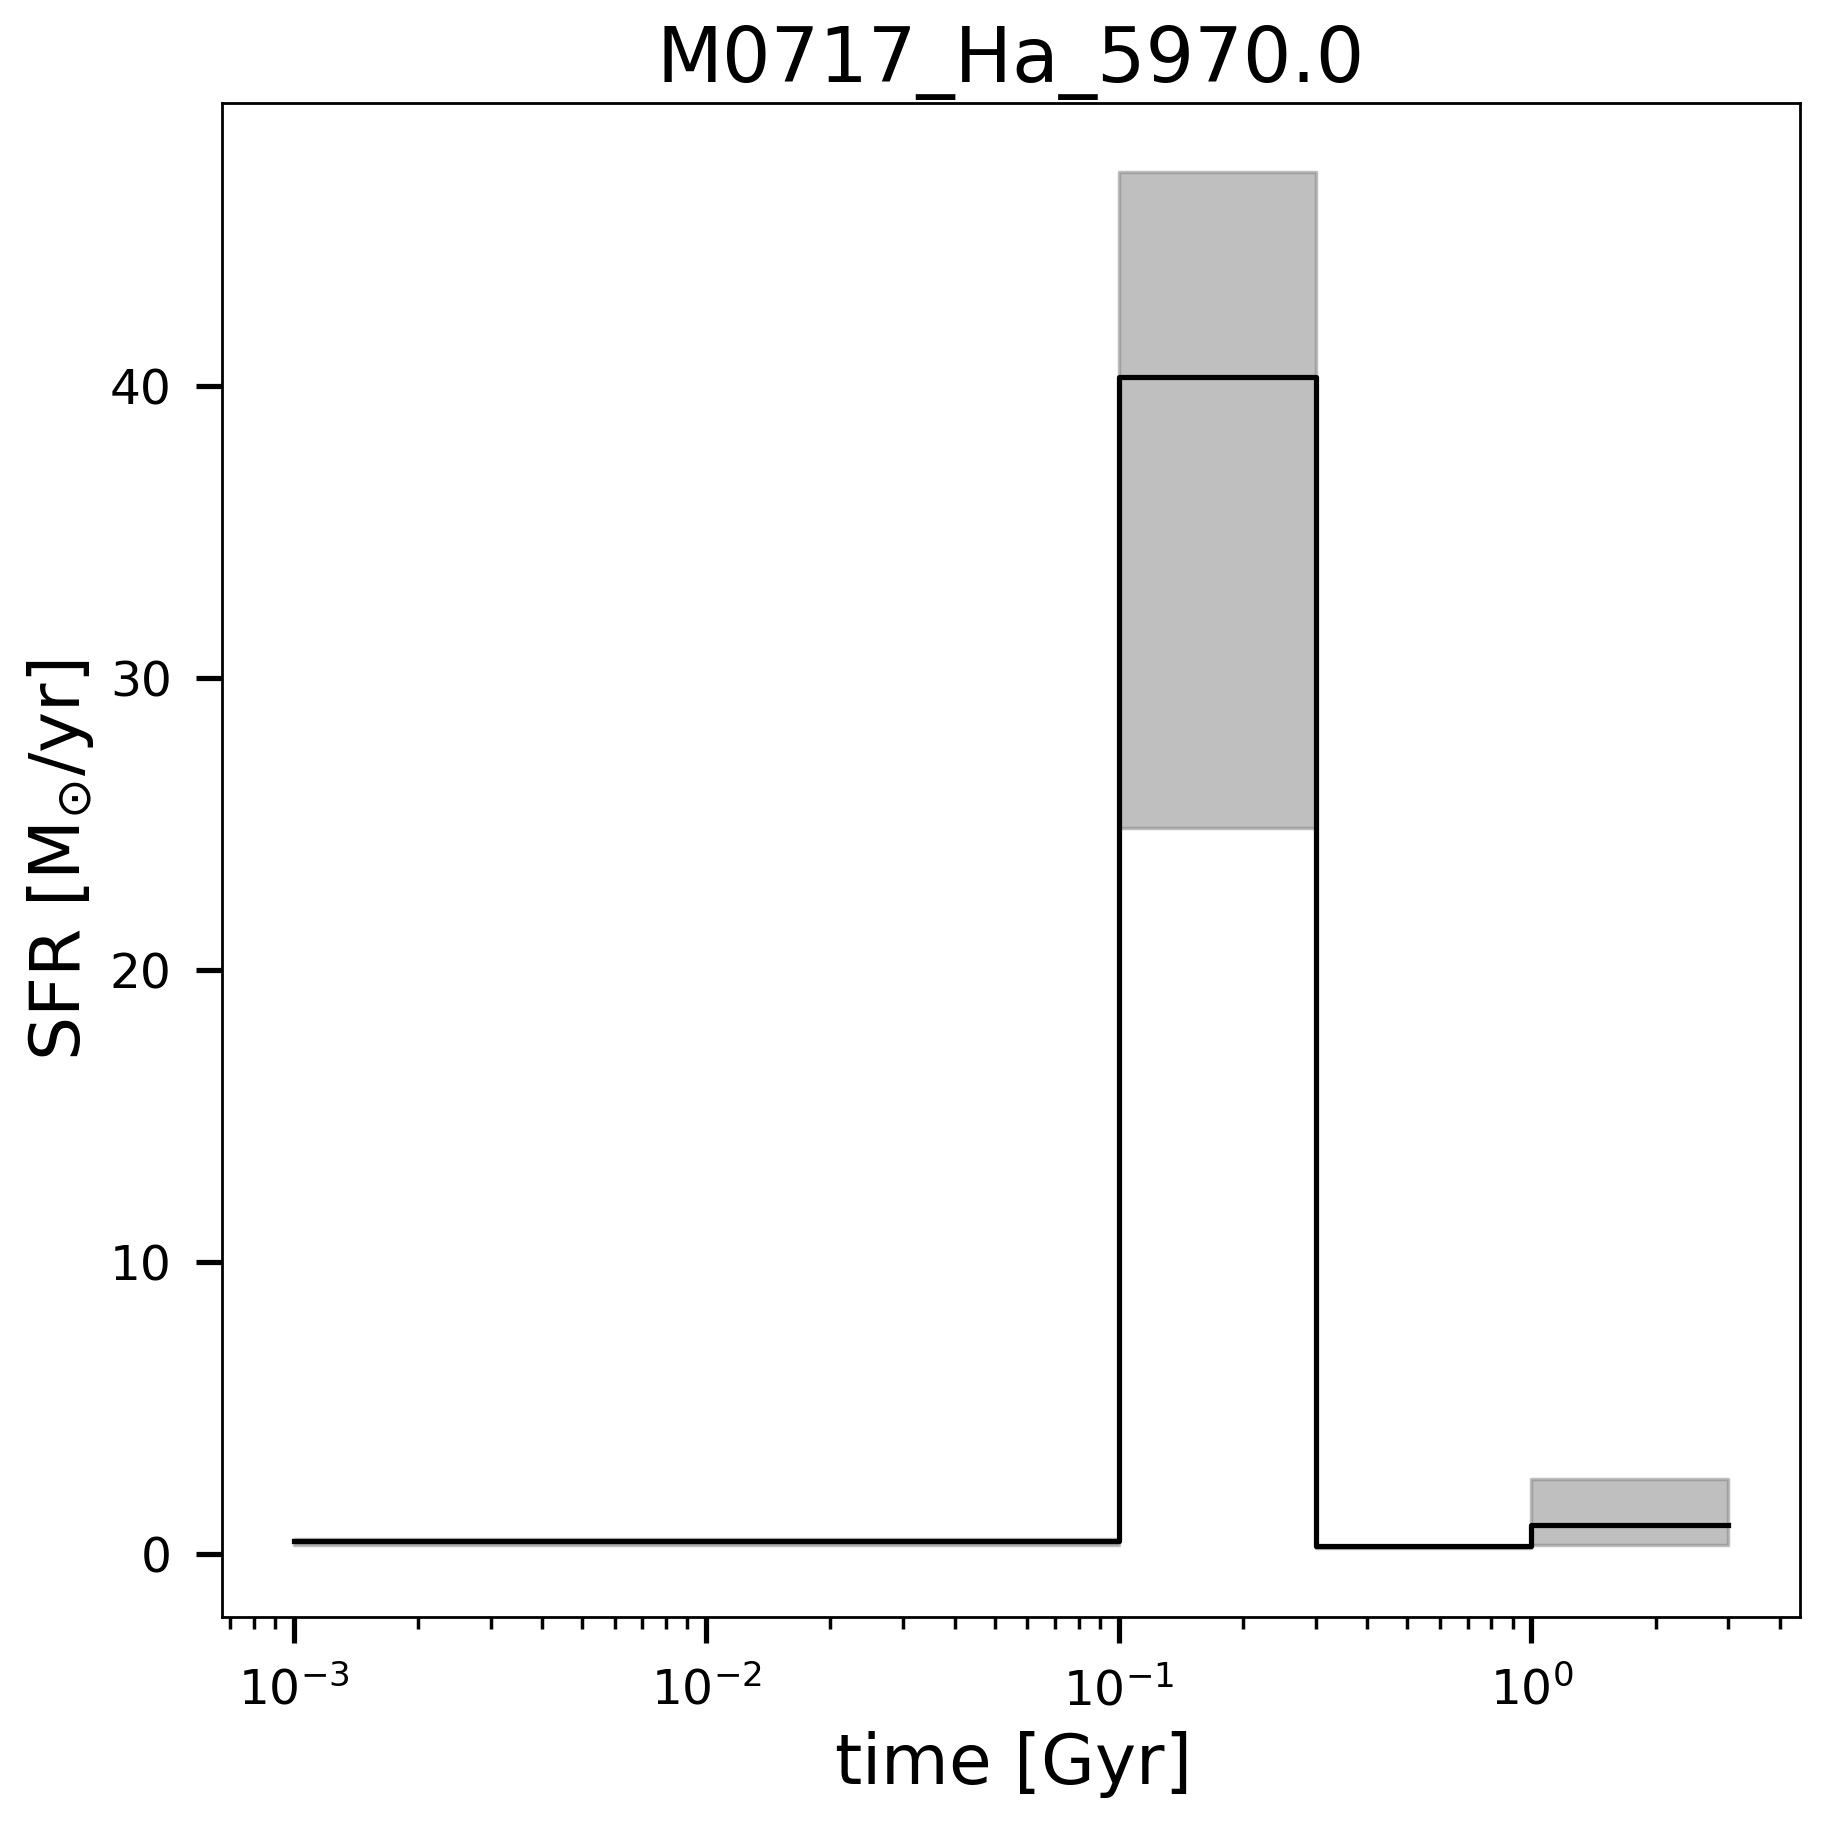

In [88]:
### To convert the z_fraction to sfr at each time bin:

def zfrac_to_masses(total_mass=None, z_fraction=None, agebins=None, **extras):
    """This transforms from independent dimensionless `z` variables to sfr
    fractions and then to bin mass fractions. The transformation is such that
    sfr fractions are drawn from a Dirichlet prior.  See Betancourt et al. 2010
    and Leja et al. 2017
    :param total_mass:
        The total mass formed over all bins in the SFH.
    :param z_fraction:
        latent variables drawn form a specific set of Beta distributions. (see
        Betancourt 2010)
    :returns masses:
        The stellar mass formed in each age bin.
    """
    # sfr fractions
    sfr_fraction = np.zeros(len(z_fraction) + 1)
    sfr_fraction[0] = 1.0 - z_fraction[0]
    for i in range(1, len(z_fraction)):
        sfr_fraction[i] = np.prod(z_fraction[:i]) * (1.0 - z_fraction[i])
    sfr_fraction[-1] = 1 - np.sum(sfr_fraction[:-1])

    # convert to mass fractions
    time_per_bin = np.diff(10**agebins, axis=-1)[:, 0]
    mass_fraction = sfr_fraction * np.array(time_per_bin)
    mass_fraction /= mass_fraction.sum()

    masses = total_mass * mass_fraction
    return masses


def zfrac_to_sfr(total_mass=None, z_fraction=None, agebins=None, **extras):
    """This transforms from independent dimensionless `z` variables to SFRs.
    :returns sfrs:
        The SFR in each age bin (msun/yr).
    """
    time_per_bin = np.diff(10**agebins, axis=-1)[:, 0]
    masses = zfrac_to_masses(total_mass, z_fraction, agebins)
    return masses / time_per_bin

# agelims=np.array([0   , 7.47712125, 8., 8.47712125 , 9. ,  9.47712125 ,  9.77815125, 10.13353891]) ## b/c at zred 2.39, universe age is 2.8 Gyr. ## If we add Halpha emission lines and want SFR over last 30 Myr, we add 7.47712.
agelims=np.array([0   , 7.47712125, 8., 8.47712125 , 9. ,  9.47712125 ,  9.77815125, 10.13353891]) ## If we add Halpha emission lines and want SFR over last 30 Myr.
# agelims=np.array([0   , 8., 8.47712125 , 9. ,  9.47712125 ,  9.77815125, 10.13353891]) 
   
a1=np.log10(age_universe*1e9)
agelims=np.append(agelims[agelims<=a1],agelims[len(agelims[agelims<=a1])])
    

agebins1 = np.array([agelims[:-1], agelims[1:]]).T


zfrac_list=np.array([])
ss=result2['theta_labels']  ## In order to remove z_fraction_* and replace them with sfr_*
for k in range(len(ss)):
    if ss[k][:10]=='z_fraction':
        zfrac_list=np.append(zfrac_list,k)
        
        
zfrac_list=zfrac_list.astype(int).tolist()
s4=np.array([ss[i] for i in range (len (ss)) if i in zfrac_list])

id_zfrac=np.nonzero(s4)[0] 
# cols_pros=[]


z_fraction1=np.array([])
z_frac_err_up=np.array([])
z_frac_err_dn=np.array([])
for i in id_zfrac:
    z_fraction1=np.append(z_fraction1, best_vals(xx,np.nonzero(s4[i]== ss)[0][0])[0])
    z_frac_err_up=np.append(z_frac_err_up, best_vals(xx,np.nonzero(s4[i]== ss)[0][0])[1])
    z_frac_err_dn=np.append(z_frac_err_dn, best_vals(xx,np.nonzero(s4[i]== ss)[0][0])[2])

z_frac_up=z_fraction1+z_frac_err_up
z_frac_dn=z_fraction1-z_frac_err_dn

print (z_fraction1, z_frac_err_up, z_frac_err_dn)

total_mass1=np.power(10, best_vals(xx, result2['theta_labels']=='total_mass')[0])  ## best-fit mass

# z_fraction1=np.array([0.5,0.8,0.84,0.91,0.96,0.87])
# z_frac_err_up=z_fraction1+ np.array([0.08,0.12,0.10,0.06,0.03,0.08])
# z_frac_err_dn=z_fraction1- np.array([0.07,0.12,0.11,0.08,0.06,0.13])

# total_mass1_errup

sfr=zfrac_to_sfr(total_mass1, z_fraction1, agebins1)
sfr_up=zfrac_to_sfr(total_mass1, z_frac_up, agebins1)
sfr_dn=zfrac_to_sfr(total_mass1, z_frac_dn, agebins1)

ssfr=sfr/total_mass1
# ssfr_up=

age_GYR=np.power(10, agelims)/1e9
age_GYR[0]=1e-3
# age_gyr=np.array([1e-3, 3e-2, 0.1, 0.3, 1.0,3,6])
age_gyr=age_GYR[:-1]
# age2=np.array([ 3e-2, 0.1, 0.3, 1.0, 3 ,6, 13.6])
age2=age_GYR[1:]
age3=(age2-age_gyr)/2
age4=age_gyr+age3
width=(age2-age_gyr)

fig=plt.figure(figsize=(8,8) , dpi= 250)
ax=fig.add_subplot(1,1,1)

age1=age_GYR
sfr1=np.append(sfr, sfr[-1])
sfr_up1=np.append(sfr_up, sfr_up[-1])
sfr_dn1=np.append(sfr_dn, sfr_dn[-1])

plt.step(age1, sfr1, where='post', color='black')
plt.xscale('log')
plt.ylabel(r'$\rm{SFR\ [M_{\odot}/yr]}$', fontsize=20)
plt.xlabel(r'$\rm{time\ [Gyr]}$', fontsize=20)
# ax.set_xticks([0.01, 0.1, 1, 10])
ax.tick_params(axis='both', labelsize=14)
plt.fill_between(age1,sfr1, sfr_up1, color='gray', step='post', alpha=0.5)
plt.fill_between(age1,sfr1, sfr_dn1, color='gray', step='post', alpha=0.5)
plt.title(obj_name, fontsize=22)
plt.tight_layout()
plt.savefig('8_SFH_'+obj_name+'.jpg')

In [184]:
### save the params in a file:
## write into an excel file:


df=pd.read_excel('8_prospector_SED_fits.xlsx')



new_row = {'cluster': str(cluster),
##shipley:
'arc': spec_id ,
'ra': np.array(ra1)[ind1][0],
'dec': np.array(dec1)[ind1][0],
'id_shipley': np.array(id1)[ind1][0],
'zred_gburek_shipley': zred[0],
'magnification': np.array(magnification)[0],
'mass_alavi_shipley': log_mass_sh[0],
'log_tau_alavi_shipley': log_tau_sh[0],   
'z_metal_alavi_shipley': z_metal_sh[0], 
'log_age_alavi_shipley': log_age_sh[0], 
'Av_alavi_shipley': Av_sh[0],   
'log_sfr_alavi_shipley': log_sfr_sh[0], 


## Ani:
# 'arc': spec_id ,
# 'ra': np.array(ra1),
# 'dec': np.array(dec1),
# 'id_shipley': '-1',
# 'zred_gburek_shipley': np.around(zphot6,4),
# 'magnification': np.around(magnification,4),
# 'mass_alavi_shipley': np.around(log_mass_sh,2),
# 'log_tau_alavi_shipley': np.around(log_tau_sh,1),   
# 'z_metal_alavi_shipley': z_metal_sh, 
# 'log_age_alavi_shipley': np.around(log_age_sh,1), 
# 'Av_alavi_shipley': Av_sh,   
# 'log_sfr_alavi_shipley': log_sfr_sh, 
}


# ['dust2'] best_vals(xx,== result2['theta_labels'])[0],
# 'f_agn':  best_vals(xx,== result2['theta_labels'])[0],
# 'agn_tau':  best_vals(xx,== result2['theta_labels'])[0],
# 'log_zsol':  best_vals(xx,== result2['theta_labels'])[0],
# 'sfr1': ,
# 'sfr2': ,
# 'sfr3': ,
# 'sfr4': ,
# 'sfr5': ,   
# 'sfr6': , 
# 'sfr7': , 
# 'log_mass':  best_vals(xx,== result2['theta_labels'])[0], 
# 'dust_ratio':  best_vals(xx,== result2['theta_labels'])[0],

zfrac_list=np.array([])
ss=result2['theta_labels']  ## In order to remove z_fraction_* and replace them with sfr_*
for k in range(len(ss)):
    if ss[k][:10]=='z_fraction':
        zfrac_list=np.append(zfrac_list,k)
zfrac_list=zfrac_list.astype(int).tolist()
sss=np.array([ss[i] for i in range (len (ss)) if i not in zfrac_list])
id_non_zfrac=np.array([i for i in range (len (ss)) if i not in zfrac_list])
cols_pros=[]


for i in id_non_zfrac:
    cols_pros.append(ss[i])
    cols_pros.append(ss[i]+str('_errup'))
    cols_pros.append(ss[i]+str('_errdn'))

for i in id_non_zfrac:
    new_row[ss[i]]=best_vals(xx,np.nonzero(ss[i]== ss)[0][0])[0]
    new_row[ss[i]+str('_errup')]=best_vals(xx,np.nonzero(ss[i]== ss)[0][0])[1]
    new_row[ss[i]+str('_errdn')]=best_vals(xx,np.nonzero(ss[i]== ss)[0][0])[2]
    
    
    
## save SFRs:
for j in range ( len (agelims)-1):
    new_row['sfr_'+str(j+1)]=np.around(sfr[j],2)
    new_row['sfr_'+str(j+1)+'_errup']=np.around(sfr_up[j],2)
    new_row['sfr_'+str(j+1)+'_errdn']=np.around(sfr_dn[j],2)
    


for j in range ( len (agelims)-1):
    cols_pros.append('sfr_'+str(j+1))
    cols_pros.append('sfr_'+str(j+1)+'_errup')
    cols_pros.append('sfr_'+str(j+1)+'_errdn')
    

columns=['cluster','arc','ra','dec','id_shipley','zred_gburek_shipley','magnification'
,'mass_alavi_shipley','log_tau_alavi_shipley', 'z_metal_alavi_shipley', 'log_age_alavi_shipley', 'Av_alavi_shipley', 'log_sfr_alavi_shipley'] + (cols_pros) 

### For the first time that we want to creat an excel file:
# df=pd.DataFrame(new_row, index=[0])
# df.to_excel('8_prospector_Tim.xlsx', index=False , columns=columns)


# #Append row to the dataframe
df = df.append(new_row, ignore_index=True)
df.to_excel('8_prospector_SED_fits.xlsx', index=False )


In [283]:
id6[0]

3847.0

In [545]:
## Save this code and all the outputs (plots, etc.) in a pdf :
# subprocess.check_call(['jupyter', 'nbconvert', '7_run_prospector_for_all_arcs.ipynb', '--to', 'pdf', '--output', '7_'+str(cluster)+'_'+str(arc_name)+'_'+str(id_arc2)+'.pdf'])

In [182]:
## Convert some images to the pdf
import subprocess
subprocess.check_call(['convert','*'+obj_name+'.jpg', '8_'+obj_name+'.pdf'])

# subprocess.check_call(['rm', '*'+obj_name+'.jpg'])

0

In [183]:
'8_'+obj_name+'.pdf'

'8_M0717_1531.0.pdf'

In [7]:
agelims=np.array([0   , 8., 8.47712125 , 9. ,  9.47712125 ,  9.77815125, 10.13353891]) 
np.power(10, agelims)/1e9

array([1.00000000e-09, 1.00000000e-01, 2.99999997e-01, 1.00000000e+00,
       2.99999997e+00, 5.99999999e+00, 1.36000001e+01])

In [19]:
obj_name


'A1689_722.0'